## Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximize earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones that exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.

## Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

 
## Key Questions

- Which variables should be used for clustering?
- How do the different clusters vary?
- How to use PCA to retain the components which explain 90% variance?
- How to perform clustering using the components obtained from PCA?


### Data Description

The data provided is of stock prices and some financial indicators like ROE, earnings per share, P/E ratio, etc.


**Data Dictionary**
--Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market

--Company: Name of the company

--GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations

--GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations

--Current Price: Current stock price in dollars

--Price Change: Percentage change in the stock price in 13 weeks

--Volatility: Standard deviation of the stock price over the past 13 weeks

--ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)

--Cash Ratio: The ratio of a company's total reserves of cash and cash equivalents to its total current liabilities

--Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)

--Net Income: Revenues minus expenses, interest, and taxes (in dollars)

--Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
Estimated Shares Outstanding: Company's stock currently held by all its shareholders

--P/E Ratio: Ratio of the company's current stock price to the earnings per share

--P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

In [1]:
## Importing necessary libraries and data
# this will help in making the Python code more structured automatically (good coding practice)
%reload_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import pdist

# to compute distances
from scipy.spatial.distance import cdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

In [2]:
# loading the dataset
data = pd.read_csv("stock_data.csv")

<IPython.core.display.Javascript object>

## Data Overview
- Observations
- Sanity checks

In [3]:
data.shape

(340, 15)

<IPython.core.display.Javascript object>

**The dataset has 340 rows and 15 columns.**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

<IPython.core.display.Javascript object>

In [5]:
# viewing a random sample of the dataset
data.sample(n=12, random_state=1)

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
102,DVN,Devon Energy Corp.,Energy,Oil & Gas Exploration & Production,32.000000,-15.478079,2.923698,205,70,830000000,-14454000000,-35.55,4.065823e+08,93.089287,1.785616
125,FB,Facebook,Information Technology,Internet Software & Services,104.660004,16.224320,1.320606,8,958,592000000,3669000000,1.31,2.800763e+09,79.893133,5.884467
11,AIV,Apartment Investment & Mgmt,Real Estate,REITs,40.029999,7.578608,1.163334,15,47,21818000,248710000,1.52,1.636250e+08,26.335526,-1.269332
248,PG,Procter & Gamble,Consumer Staples,Personal Products,79.410004,10.660538,0.806056,17,129,160383000,636056000,3.28,4.913916e+08,24.070121,-2.256747
238,OXY,Occidental Petroleum,Energy,Oil & Gas Exploration & Production,67.610001,0.865287,1.589520,32,64,-588000000,-7829000000,-10.23,7.652981e+08,93.089287,3.345102
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,4.353535e+08,17.682214,-3.838260
112,EQT,EQT Corporation,Energy,Oil & Gas Exploration & Production,52.130001,-21.253771,2.364883,2,201,523803000,85171000,0.56,1.520911e+08,93.089287,9.567952
147,HAL,Halliburton Co.,Energy,Oil & Gas Equipment & Services,34.040001,-5.101751,1.966062,4,189,7786000000,-671000000,-0.79,8.493671e+08,93.089287,17.345857
89,DFS,Discover Financial Services,Financials,Consumer Finance,53.619999,3.653584,1.159897,20,99,2288000000,2297000000,5.14,4.468872e+08,10.431906,-0.375934
173,IVZ,Invesco Ltd.,Financials,Asset Management & Custody Banks,33.480000,7.067477,1.580839,12,67,412000000,968100000,2.26,4.283628e+08,14.814159,4.218620


<IPython.core.display.Javascript object>

In [6]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()

<IPython.core.display.Javascript object>

In [7]:
# fixing column names
df.columns = [c.replace(" ", "_") for c in df.columns]

<IPython.core.display.Javascript object>

In [8]:
# let's look at the structure of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker_Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS_Sector                   340 non-null    object 
 3   GICS_Sub_Industry             340 non-null    object 
 4   Current_Price                 340 non-null    float64
 5   Price_Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash_Ratio                    340 non-null    int64  
 9   Net_Cash_Flow                 340 non-null    int64  
 10  Net_Income                    340 non-null    int64  
 11  Earnings_Per_Share            340 non-null    float64
 12  Estimated_Shares_Outstanding  340 non-null    float64
 13  P/E_R

<IPython.core.display.Javascript object>

**We won't need Security which is company name for analysis, so let's drop this column.**

In [9]:
df.drop("Security", axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [10]:
# let's check for duplicate observations
df.duplicated().sum()

0

<IPython.core.display.Javascript object>

- **There are 0 duplicate observations.**

In [11]:
# let's check for missing values.
df.isnull().sum()

Ticker_Symbol                   0
GICS_Sector                     0
GICS_Sub_Industry               0
Current_Price                   0
Price_Change                    0
Volatility                      0
ROE                             0
Cash_Ratio                      0
Net_Cash_Flow                   0
Net_Income                      0
Earnings_Per_Share              0
Estimated_Shares_Outstanding    0
P/E_Ratio                       0
P/B_Ratio                       0
dtype: int64

<IPython.core.display.Javascript object>

**There are no missing values**

**Let's take a look at the summary of the data**

In [12]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ticker_Symbol,340,340,SCG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS_Sector,340,11,Industrials,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS_Sub_Industry,340,104,Oil & Gas Exploration & Production,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current_Price,340.0,NaN,NaN,NaN,80.862345,98.055086,4.5,38.555,59.705,92.880001,1274.949951
Price_Change,340.0,NaN,NaN,NaN,4.078194,12.006338,-47.129693,-0.939484,4.819505,10.695493,55.051683
Volatility,340.0,NaN,NaN,NaN,1.525976,0.591798,0.733163,1.134878,1.385593,1.695549,4.580042
ROE,340.0,NaN,NaN,NaN,39.597059,96.547538,1.0,9.75,15.0,27.0,917.0
Cash_Ratio,340.0,NaN,NaN,NaN,70.023529,90.421331,0.0,18.0,47.0,99.0,958.0
Net_Cash_Flow,340.0,NaN,NaN,NaN,55537620.588235,1946365312.175789,-11208000000.0,-193906500.0,2098000.0,169810750.0,20764000000.0
Net_Income,340.0,NaN,NaN,NaN,1494384602.941176,3940150279.327937,-23528000000.0,352301250.0,707336000.0,1899000000.0,24442000000.0


<IPython.core.display.Javascript object>

* Many columns, like ROE, Cash Ratio, Net Cash Flow, Net Income are int64
* Ticker, Security, GICS Sector and GICS Sub Industry are of Object type
* There are 340 Unique stocks symbol
* There are 11 unique types of GICS specific economic sector
* There are 104 types of GICS specific sub-industry group assigned with 'Oil & Gas Exploration & Production' being the most frequent with 16 entries
* The average price changes is 4.07 of the stocks
* Minimum price change is -47.12 
* Average cash ratio is 70.02
* Average Earnings per share is 2.77
* Minimum EPS is -61.20
* Maximim EPS is 50.09
* Average P/E Ratio is 32.61, Minimum P/E ratio is 2.93 and Maximum P/E Ratio is 528.03


## Exploratory Data Analysis (EDA)


**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

### Univariate Analysis

In [13]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

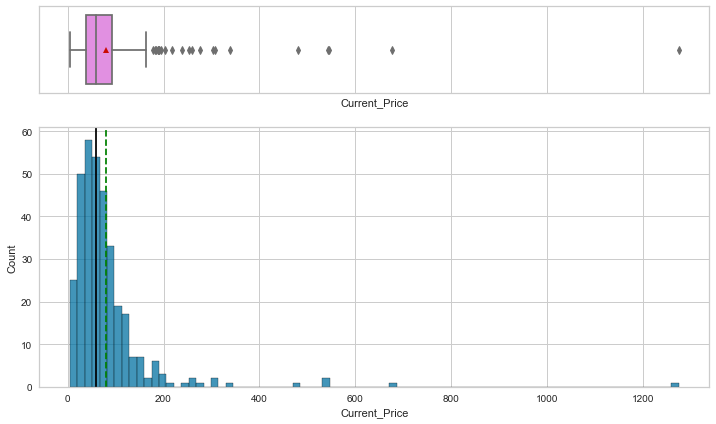

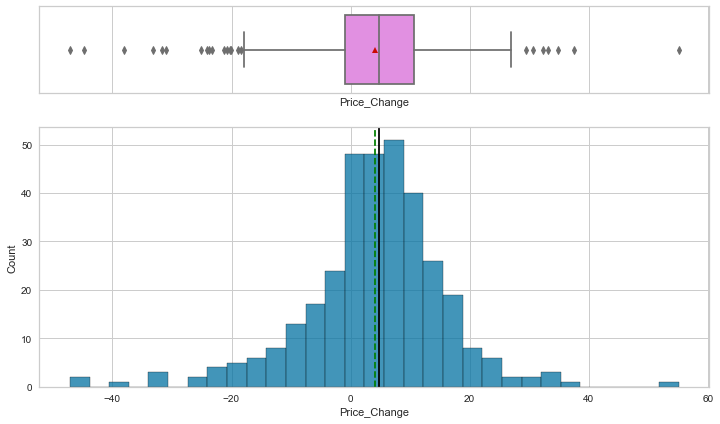

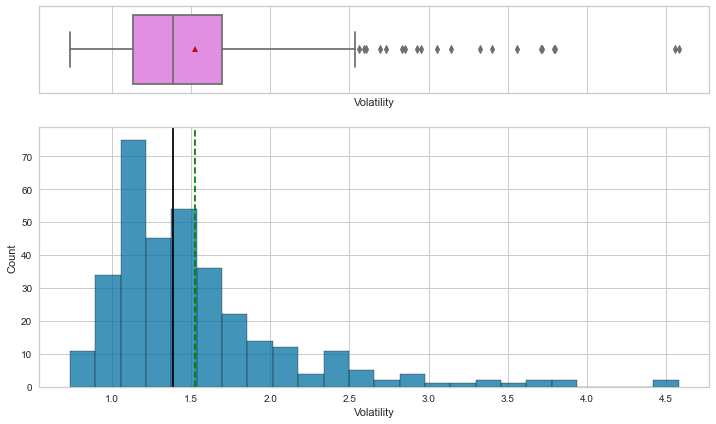

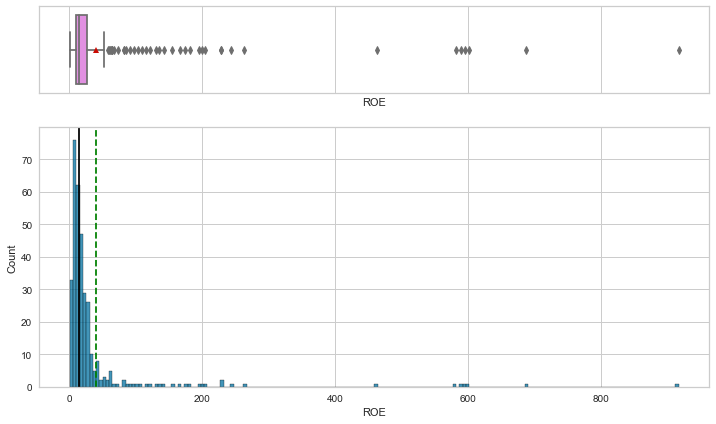

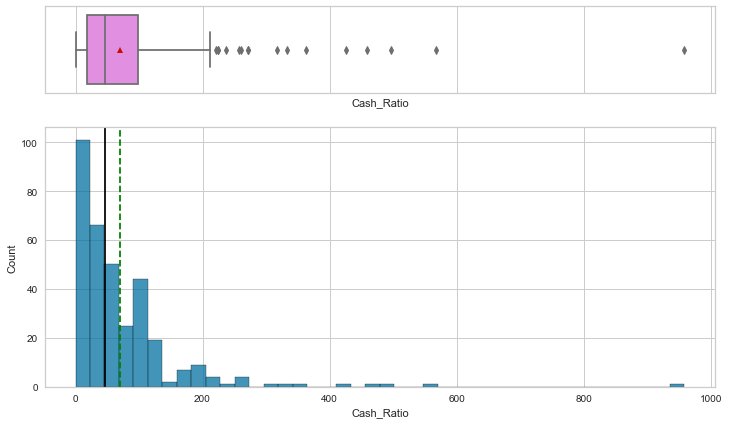

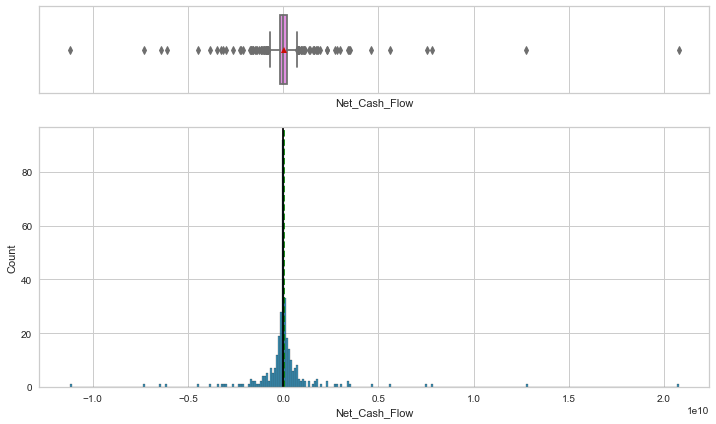

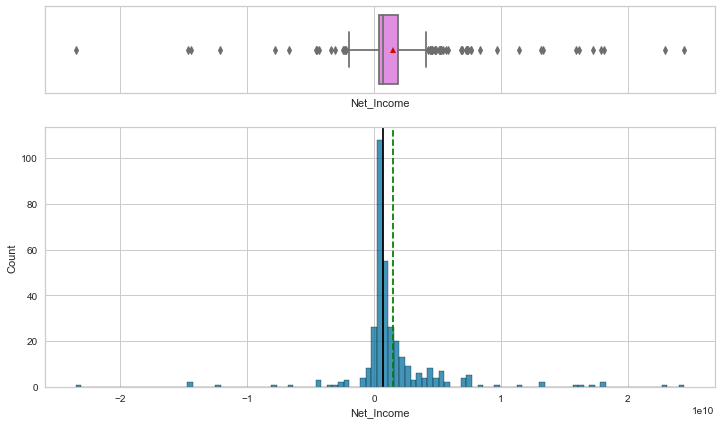

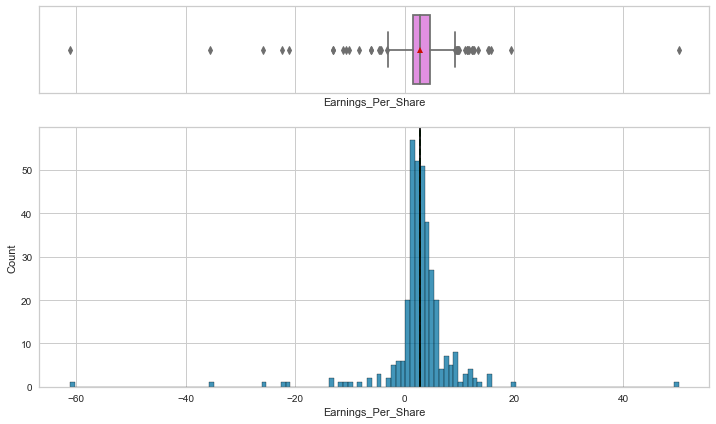

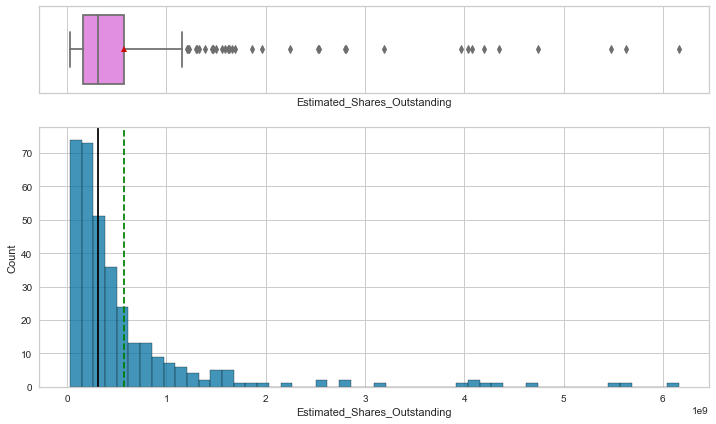

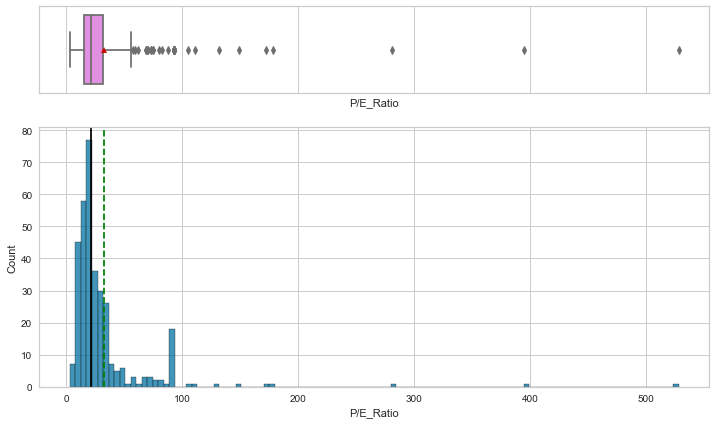

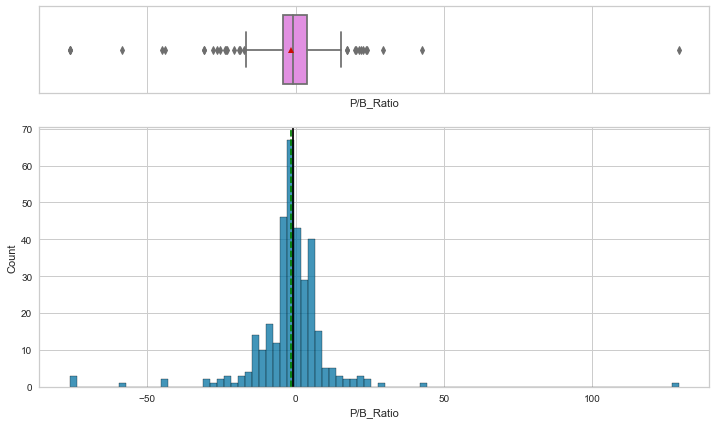

<IPython.core.display.Javascript object>

In [14]:
# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

for item in num_col:
    histogram_boxplot(df, item)

### Observations

- Current Price is rightly skewed with upper outlier, Which indicates presence of expensive stock prices.
- Price change is close to normally distributed. 
- Majority stocks volatility falls between 1.0 to 2.0 and highest volatile stocks have a volatility of 4.5. 
- ROE is right skewed with upper outliers. 
- Cash ratio is rightly skewed with highest cash ratio lies between 800-1000. 
- Net cash flow is normally distributed. 
- Earnings per share for the companies are normally distributed. 
- Estimated share outstanding is rightly skewed.
- P/E ratio is rightly skewed. 

In [15]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

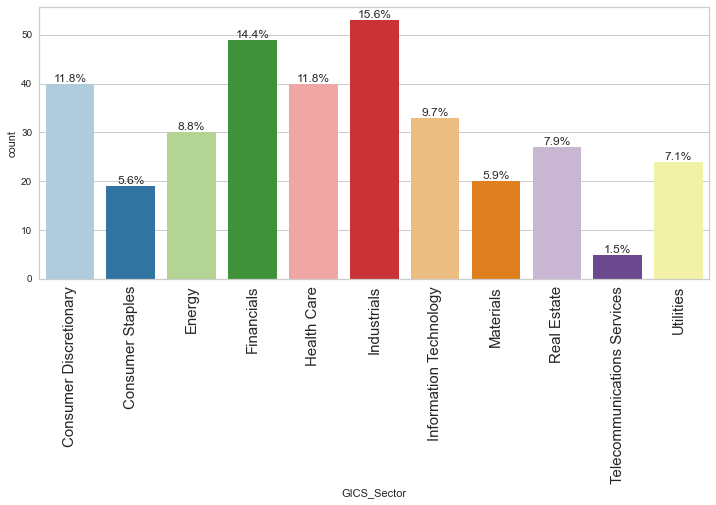

<IPython.core.display.Javascript object>

In [16]:
labeled_barplot(df, "GICS_Sector", perc=True)

### Observations

- Approx. 15.6% of the companies are in the Industrial segment
- Telecom services has the least number of companies in the data.

## Bi-Variate Analysis 



**Let's check for correlations.**

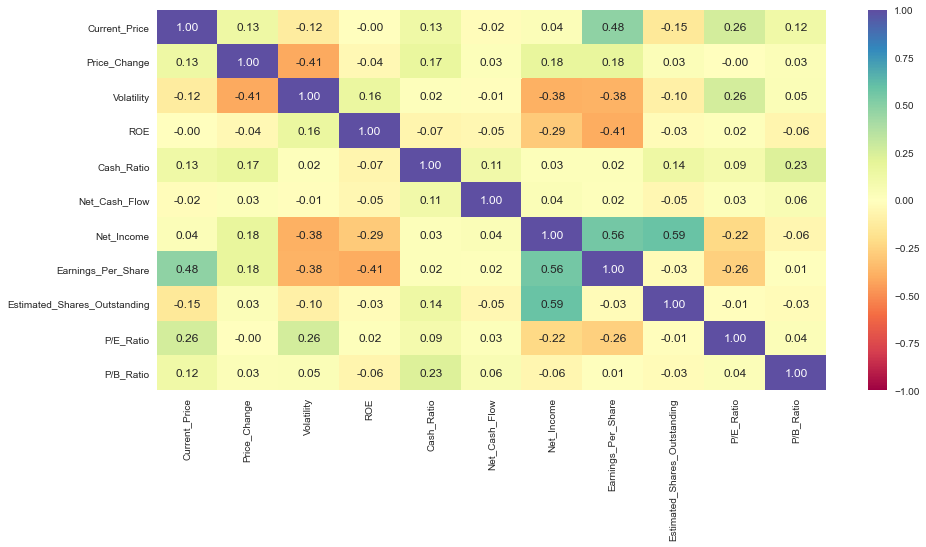

<IPython.core.display.Javascript object>

In [17]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 7))

sns.heatmap(
    df[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

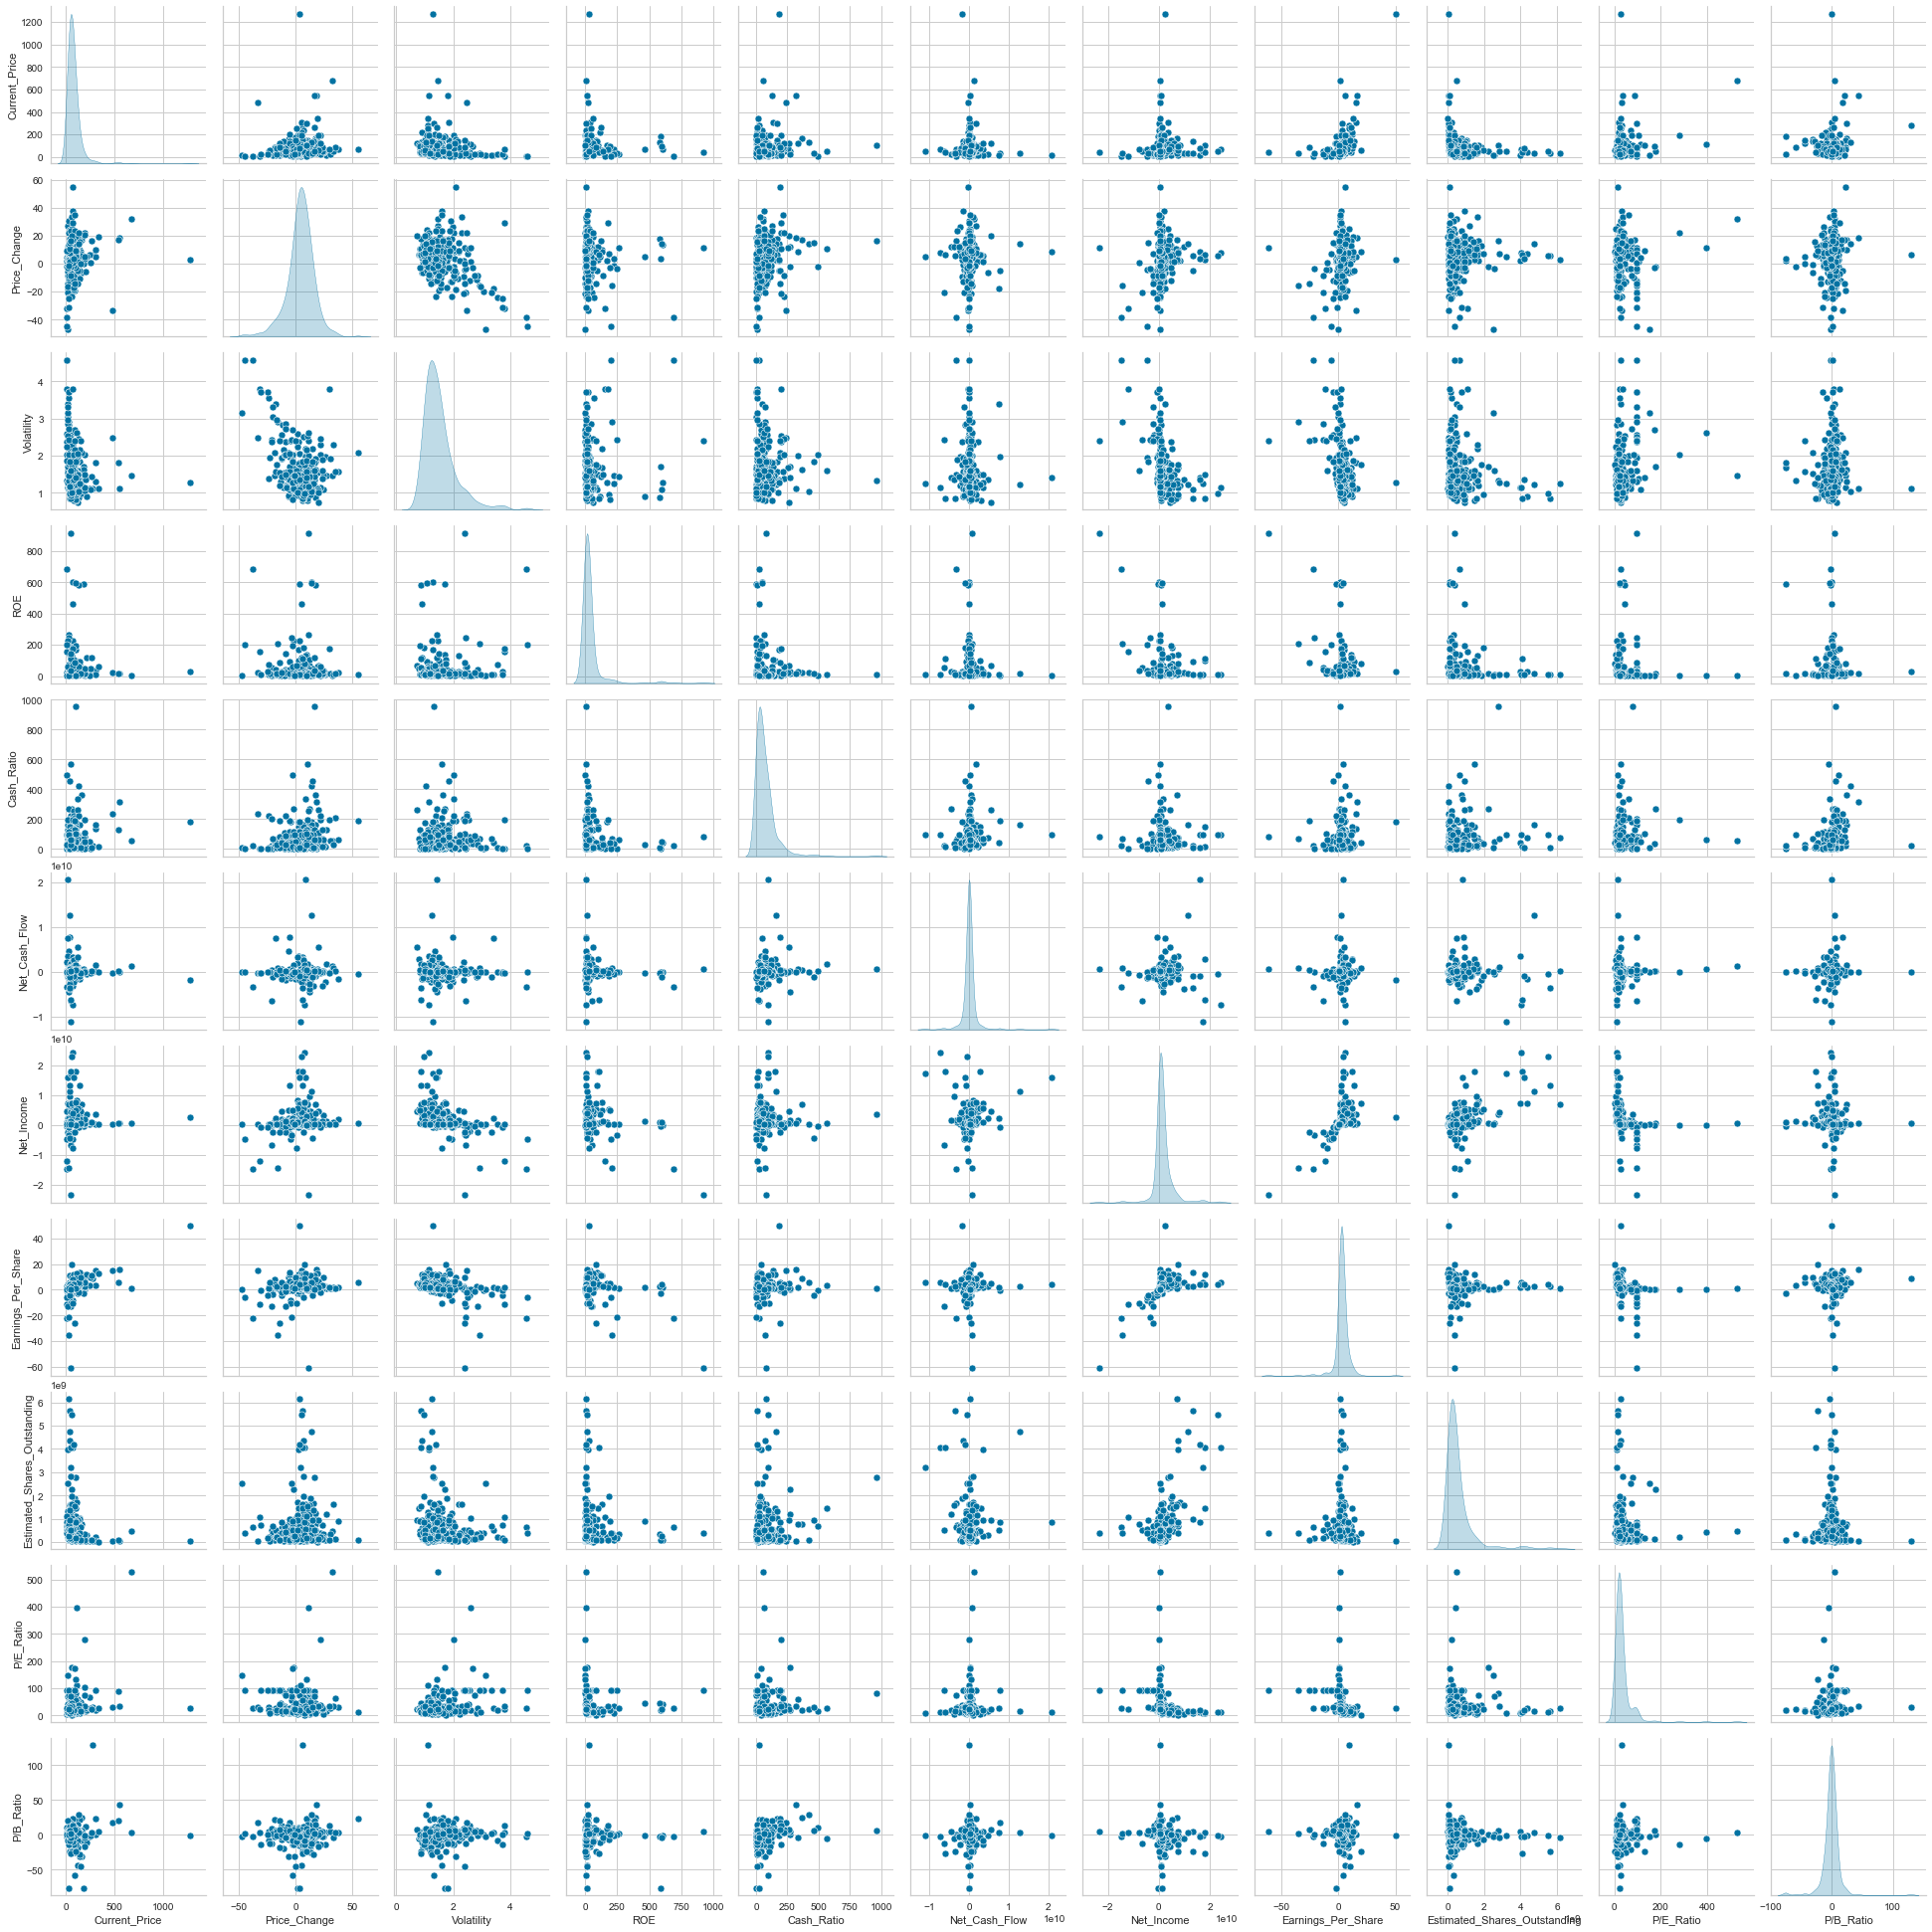

<IPython.core.display.Javascript object>

In [18]:
sns.pairplot(data=df[num_col], diag_kind="kde")
plt.show()

## Feature Scaling 

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker_Symbol                 340 non-null    object 
 1   GICS_Sector                   340 non-null    object 
 2   GICS_Sub_Industry             340 non-null    object 
 3   Current_Price                 340 non-null    float64
 4   Price_Change                  340 non-null    float64
 5   Volatility                    340 non-null    float64
 6   ROE                           340 non-null    int64  
 7   Cash_Ratio                    340 non-null    int64  
 8   Net_Cash_Flow                 340 non-null    int64  
 9   Net_Income                    340 non-null    int64  
 10  Earnings_Per_Share            340 non-null    float64
 11  Estimated_Shares_Outstanding  340 non-null    float64
 12  P/E_Ratio                     340 non-null    float64
 13  P/B_R

<IPython.core.display.Javascript object>

In [20]:
oneHotCols = ["GICS_Sector", "GICS_Sub_Industry"]

<IPython.core.display.Javascript object>

In [21]:
# Outlier treatment using capping and flooring


def treat_outliers(df, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


# Outlier treatment function
def treat_outliers_all(df, col_list):
    """
    treat outlier in all numerical variables
    col_list: list of numerical variables
    df: data frame
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

<IPython.core.display.Javascript object>

In [22]:
# treating the outliers
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
df = treat_outliers_all(df, numerical_col)

<IPython.core.display.Javascript object>

In [23]:
# Run the OneHot Cols function converting the values across the categorical fields
df = pd.get_dummies(df, columns=oneHotCols, drop_first=True)
df.head(10)

,Ticker_Symbol,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,P/E_Ratio,P/B_Ratio,GICS_Sector_Consumer Staples,GICS_Sector_Energy,GICS_Sector_Financials,GICS_Sector_Health Care,GICS_Sector_Industrials,GICS_Sector_Information Technology,GICS_Sector_Materials,GICS_Sector_Real Estate,GICS_Sector_Telecommunications Services,GICS_Sector_Utilities,GICS_Sub_Industry_Aerospace & Defense,GICS_Sub_Industry_Agricultural Products,GICS_Sub_Industry_Air Freight & Logistics,GICS_Sub_Industry_Airlines,GICS_Sub_Industry_Alternative Carriers,"GICS_Sub_Industry_Apparel, Accessories & Luxury Goods",GICS_Sub_Industry_Application Software,GICS_Sub_Industry_Asset Management & Custody Banks,GICS_Sub_Industry_Auto Parts & Equipment,GICS_Sub_Industry_Automobile Manufacturers,GICS_Sub_Industry_Banks,GICS_Sub_Industry_Biotechnology,GICS_Sub_Industry_Brewers,GICS_Sub_Industry_Broadcasting & Cable TV,GICS_Sub_Industry_Building Products,GICS_Sub_Industry_Cable & Satellite,GICS_Sub_Industry_Casinos & Gaming,GICS_Sub_Industry_Computer Hardware,GICS_Sub_Industry_Construction & Farm Machinery & Heavy Trucks,GICS_Sub_Industry_Construction Materials,GICS_Sub_Industry_Consumer Electronics,GICS_Sub_Industry_Consumer Finance,GICS_Sub_Industry_Copper,GICS_Sub_Industry_Data Processing & Outsourced Services,GICS_Sub_Industry_Distributors,GICS_Sub_Industry_Diversified Chemicals,GICS_Sub_Industry_Diversified Commercial Services,GICS_Sub_Industry_Diversified Financial Services,GICS_Sub_Industry_Drug Retail,GICS_Sub_Industry_Electric Utilities,GICS_Sub_Industry_Electrical Components & Equipment,GICS_Sub_Industry_Electronic Components,GICS_Sub_Industry_Electronic Equipment & Instruments,GICS_Sub_Industry_Environmental Services,GICS_Sub_Industry_Fertilizers & Agricultural Chemicals,GICS_Sub_Industry_Financial Exchanges & Data,GICS_Sub_Industry_Gold,GICS_Sub_Industry_Health Care Distributors,GICS_Sub_Industry_Health Care Equipment,GICS_Sub_Industry_Health Care Facilities,GICS_Sub_Industry_Health Care Supplies,GICS_Sub_Industry_Home Entertainment Software,GICS_Sub_Industry_Home Furnishings,GICS_Sub_Industry_Homebuilding,"GICS_Sub_Industry_Hotels, Resorts & Cruise Lines",GICS_Sub_Industry_Household Appliances,GICS_Sub_Industry_Household Products,GICS_Sub_Industry_Housewares & Specialties,GICS_Sub_Industry_Human Resource & Employment Services,GICS_Sub_Industry_IT Consulting & Other Services,GICS_Sub_Industry_Industrial Conglomerates,GICS_Sub_Industry_Industrial Gases,GICS_Sub_Industry_Industrial Machinery,GICS_Sub_Industry_Industrial Materials,GICS_Sub_Industry_Insurance Brokers,GICS_Sub_Industry_Integrated Oil & Gas,GICS_Sub_Industry_Integrated Telecommunications Services,GICS_Sub_Industry_Internet & Direct Marketing Retail,GICS_Sub_Industry_Internet Software & Services,GICS_Sub_Industry_Investment Banking & Brokerage,GICS_Sub_Industry_Leisure Products,GICS_Sub_Industry_Life & Health Insurance,GICS_Sub_Industry_Life Sciences Tools & Services,GICS_Sub_Industry_Managed Health Care,GICS_Sub_Industry_Metal & Glass Containers,GICS_Sub_Industry_Motorcycle Manufacturers,GICS_Sub_Industry_Multi-Sector Holdings,GICS_Sub_Industry_Multi-line Insurance,GICS_Sub_Industry_MultiUtilities,GICS_Sub_Industry_Networking Equipment,GICS_Sub_Industry_Office REITs,GICS_Sub_Industry_Oil & Gas Equipment & Services,GICS_Sub_Industry_Oil & Gas Exploration & Production,GICS_Sub_Industry_Oil & Gas Refining & Marketing & Transportation,GICS_Sub_Industry_Packaged Foods & Meats,GICS_Sub_Industry_Paper Packaging,GICS_Sub_Industry_Personal Products,GICS_Sub_Industry_Pharmaceuticals,GICS_Sub_Industry_Property & Casualty Insurance,GICS_Sub_Industry_Publishing,GICS_Sub_Industry_REITs,GICS_Sub_Industry_Railroads,GICS_Sub_Industry_Real Estate Services,GICS_Sub_Industry_Regional Banks,GICS_Sub_Industry_Research & Consulting Services,GICS_Sub_Industry_Residential REITs,GICS_Sub_Industry_Restaurants,GICS_Sub_Industry_Retail REITs,GICS_Sub_In

<IPython.core.display.Javascript object>

In [24]:
# Scaling the data set before clustering
scaler = StandardScaler()
subset = df[num_cols].copy()
subset_scaled = scaler.fit_transform(subset)

<IPython.core.display.Javascript object>

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Columns: 125 entries, Ticker_Symbol to GICS_Sub_Industry_Water Utilities
dtypes: float64(9), int64(2), object(1), uint8(113)
memory usage: 69.5+ KB


<IPython.core.display.Javascript object>

In [26]:
# Creating a dataframe from the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

<IPython.core.display.Javascript object>

Number of Clusters: 1 	Average Distortion: 3.1482665386211908
Number of Clusters: 2 	Average Distortion: 2.9496805890231155
Number of Clusters: 3 	Average Distortion: 2.7586235347054844
Number of Clusters: 4 	Average Distortion: 2.6330320326311103
Number of Clusters: 5 	Average Distortion: 2.5357014852346733
Number of Clusters: 6 	Average Distortion: 2.454841549729349
Number of Clusters: 7 	Average Distortion: 2.393960566855137
Number of Clusters: 8 	Average Distortion: 2.3401409374692674


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

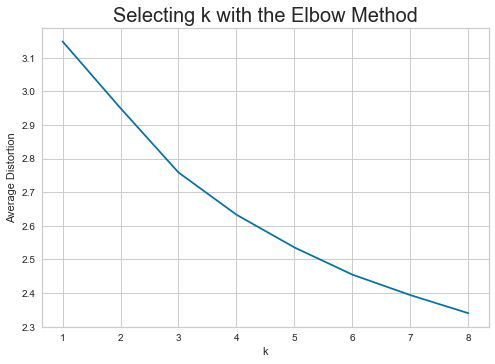

<IPython.core.display.Javascript object>

In [67]:
clusters = range(1, 9)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = (
        sum(
            np.min(cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / subset_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)

**The appropriate value of k from the elbow curve seems to be 4 or 5.**

**Let's check the silhouette scores.**

For n_clusters = 2, silhouette score is 0.15544577379948135
For n_clusters = 3, silhouette score is 0.18463057570393718
For n_clusters = 4, silhouette score is 0.17441454776856977
For n_clusters = 5, silhouette score is 0.1503698629203672
For n_clusters = 6, silhouette score is 0.15070070283319958
For n_clusters = 7, silhouette score is 0.1218736720009418
For n_clusters = 8, silhouette score is 0.13064699377680264


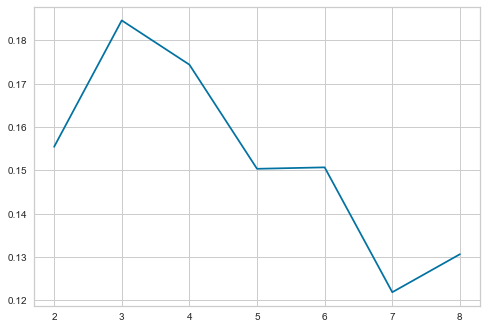

<IPython.core.display.Javascript object>

In [69]:
sil_score = []
cluster_list = list(range(2, 9))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

**From the silhouette scores, it seems that 5 is a good value of k.**

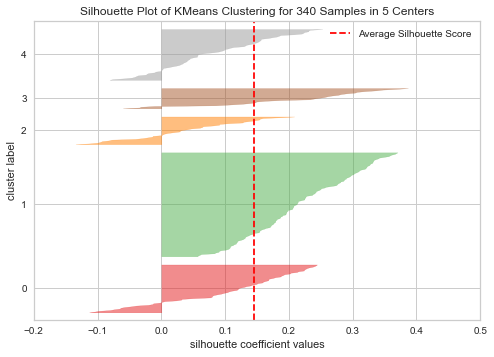

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [70]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

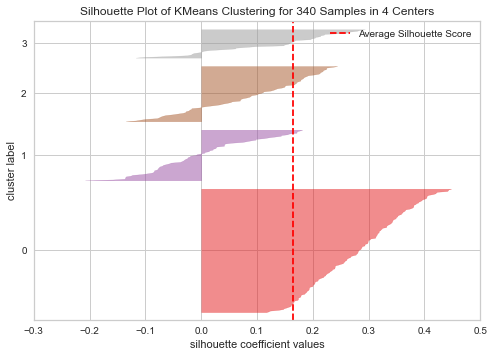

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [71]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

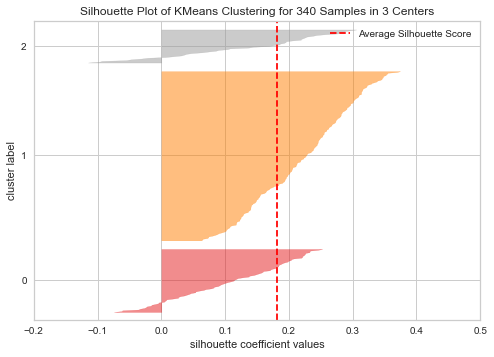

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [72]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

**Let's take 5 as the appropriate no. of clusters as the silhouette score is high enough and there is knick at 5 in the elbow curve.**

In [81]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=5, random_state=0)

<IPython.core.display.Javascript object>

In [82]:
# adding kmeans cluster labels to the original dataframe
df["K_means_segments"] = kmeans.labels_

<IPython.core.display.Javascript object>

In [83]:
cluster_profile = df.groupby("K_means_segments").mean()

<IPython.core.display.Javascript object>

In [84]:
cluster_profile

,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,P/E_Ratio,P/B_Ratio,GICS_Sector_Consumer Staples,GICS_Sector_Energy,GICS_Sector_Financials,GICS_Sector_Health Care,GICS_Sector_Industrials,GICS_Sector_Information Technology,GICS_Sector_Materials,GICS_Sector_Real Estate,GICS_Sector_Telecommunications Services,GICS_Sector_Utilities,GICS_Sub_Industry_Aerospace & Defense,GICS_Sub_Industry_Agricultural Products,GICS_Sub_Industry_Air Freight & Logistics,GICS_Sub_Industry_Airlines,GICS_Sub_Industry_Alternative Carriers,"GICS_Sub_Industry_Apparel, Accessories & Luxury Goods",GICS_Sub_Industry_Application Software,GICS_Sub_Industry_Asset Management & Custody Banks,GICS_Sub_Industry_Auto Parts & Equipment,GICS_Sub_Industry_Automobile Manufacturers,GICS_Sub_Industry_Banks,GICS_Sub_Industry_Biotechnology,GICS_Sub_Industry_Brewers,GICS_Sub_Industry_Broadcasting & Cable TV,GICS_Sub_Industry_Building Products,GICS_Sub_Industry_Cable & Satellite,GICS_Sub_Industry_Casinos & Gaming,GICS_Sub_Industry_Computer Hardware,GICS_Sub_Industry_Construction & Farm Machinery & Heavy Trucks,GICS_Sub_Industry_Construction Materials,GICS_Sub_Industry_Consumer Electronics,GICS_Sub_Industry_Consumer Finance,GICS_Sub_Industry_Copper,GICS_Sub_Industry_Data Processing & Outsourced Services,GICS_Sub_Industry_Distributors,GICS_Sub_Industry_Diversified Chemicals,GICS_Sub_Industry_Diversified Commercial Services,GICS_Sub_Industry_Diversified Financial Services,GICS_Sub_Industry_Drug Retail,GICS_Sub_Industry_Electric Utilities,GICS_Sub_Industry_Electrical Components & Equipment,GICS_Sub_Industry_Electronic Components,GICS_Sub_Industry_Electronic Equipment & Instruments,GICS_Sub_Industry_Environmental Services,GICS_Sub_Industry_Fertilizers & Agricultural Chemicals,GICS_Sub_Industry_Financial Exchanges & Data,GICS_Sub_Industry_Gold,GICS_Sub_Industry_Health Care Distributors,GICS_Sub_Industry_Health Care Equipment,GICS_Sub_Industry_Health Care Facilities,GICS_Sub_Industry_Health Care Supplies,GICS_Sub_Industry_Home Entertainment Software,GICS_Sub_Industry_Home Furnishings,GICS_Sub_Industry_Homebuilding,"GICS_Sub_Industry_Hotels, Resorts & Cruise Lines",GICS_Sub_Industry_Household Appliances,GICS_Sub_Industry_Household Products,GICS_Sub_Industry_Housewares & Specialties,GICS_Sub_Industry_Human Resource & Employment Services,GICS_Sub_Industry_IT Consulting & Other Services,GICS_Sub_Industry_Industrial Conglomerates,GICS_Sub_Industry_Industrial Gases,GICS_Sub_Industry_Industrial Machinery,GICS_Sub_Industry_Industrial Materials,GICS_Sub_Industry_Insurance Brokers,GICS_Sub_Industry_Integrated Oil & Gas,GICS_Sub_Industry_Integrated Telecommunications Services,GICS_Sub_Industry_Internet & Direct Marketing Retail,GICS_Sub_Industry_Internet Software & Services,GICS_Sub_Industry_Investment Banking & Brokerage,GICS_Sub_Industry_Leisure Products,GICS_Sub_Industry_Life & Health Insurance,GICS_Sub_Industry_Life Sciences Tools & Services,GICS_Sub_Industry_Managed Health Care,GICS_Sub_Industry_Metal & Glass Containers,GICS_Sub_Industry_Motorcycle Manufacturers,GICS_Sub_Industry_Multi-Sector Holdings,GICS_Sub_Industry_Multi-line Insurance,GICS_Sub_Industry_MultiUtilities,GICS_Sub_Industry_Networking Equipment,GICS_Sub_Industry_Office REITs,GICS_Sub_Industry_Oil & Gas Equipment & Services,GICS_Sub_Industry_Oil & Gas Exploration & Production,GICS_Sub_Industry_Oil & Gas Refining & Marketing & Transportation,GICS_Sub_Industry_Packaged Foods & Meats,GICS_Sub_Industry_Paper Packaging,GICS_Sub_Industry_Personal Products,GICS_Sub_Industry_Pharmaceuticals,GICS_Sub_Industry_Property & Casualty Insurance,GICS_Sub_Industry_Publishing,GICS_Sub_Industry_REITs,GICS_Sub_Industry_Railroads,GICS_Sub_Industry_Real Estate Services,GICS_Sub_Industry_Regional Banks,GICS_Sub_Industry_Research & Consulting Services,GICS_Sub_Industry_Residential REITs,GICS_Sub_Industry_Restaurants,GICS_Sub_Industry_Retail REITs,GICS_Sub_Industry_Semicon

<IPython.core.display.Javascript object>

In [85]:
cluster_profile["count_in_each_segment"] = (
    df.groupby("K_means_segments")["Current_Price"].count().values
)

<IPython.core.display.Javascript object>

In [90]:
cluster_profile["count_in_each_segment"]

K_means_segments
0     38
1    138
2     28
3     73
4     63
Name: count_in_each_segment, dtype: int64

<IPython.core.display.Javascript object>

In [91]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,P/E_Ratio,P/B_Ratio,GICS_Sector_Consumer Staples,GICS_Sector_Energy,GICS_Sector_Financials,GICS_Sector_Health Care,GICS_Sector_Industrials,GICS_Sector_Information Technology,GICS_Sector_Materials,GICS_Sector_Real Estate,GICS_Sector_Telecommunications Services,GICS_Sector_Utilities,GICS_Sub_Industry_Aerospace & Defense,GICS_Sub_Industry_Agricultural Products,GICS_Sub_Industry_Air Freight & Logistics,GICS_Sub_Industry_Airlines,GICS_Sub_Industry_Alternative Carriers,"GICS_Sub_Industry_Apparel, Accessories & Luxury Goods",GICS_Sub_Industry_Application Software,GICS_Sub_Industry_Asset Management & Custody Banks,GICS_Sub_Industry_Auto Parts & Equipment,GICS_Sub_Industry_Automobile Manufacturers,GICS_Sub_Industry_Banks,GICS_Sub_Industry_Biotechnology,GICS_Sub_Industry_Brewers,GICS_Sub_Industry_Broadcasting & Cable TV,GICS_Sub_Industry_Building Products,GICS_Sub_Industry_Cable & Satellite,GICS_Sub_Industry_Casinos & Gaming,GICS_Sub_Industry_Computer Hardware,GICS_Sub_Industry_Construction & Farm Machinery & Heavy Trucks,GICS_Sub_Industry_Construction Materials,GICS_Sub_Industry_Consumer Electronics,GICS_Sub_Industry_Consumer Finance,GICS_Sub_Industry_Copper,GICS_Sub_Industry_Data Processing & Outsourced Services,GICS_Sub_Industry_Distributors,GICS_Sub_Industry_Diversified Chemicals,GICS_Sub_Industry_Diversified Commercial Services,GICS_Sub_Industry_Diversified Financial Services,GICS_Sub_Industry_Drug Retail,GICS_Sub_Industry_Electric Utilities,GICS_Sub_Industry_Electrical Components & Equipment,GICS_Sub_Industry_Electronic Components,GICS_Sub_Industry_Electronic Equipment & Instruments,GICS_Sub_Industry_Environmental Services,GICS_Sub_Industry_Fertilizers & Agricultural Chemicals,GICS_Sub_Industry_Financial Exchanges & Data,GICS_Sub_Industry_Gold,GICS_Sub_Industry_Health Care Distributors,GICS_Sub_Industry_Health Care Equipment,GICS_Sub_Industry_Health Care Facilities,GICS_Sub_Industry_Health Care Supplies,GICS_Sub_Industry_Home Entertainment Software,GICS_Sub_Industry_Home Furnishings,GICS_Sub_Industry_Homebuilding,"GICS_Sub_Industry_Hotels, Resorts & Cruise Lines",GICS_Sub_Industry_Household Appliances,GICS_Sub_Industry_Household Products,GICS_Sub_Industry_Housewares & Specialties,GICS_Sub_Industry_Human Resource & Employment Services,GICS_Sub_Industry_IT Consulting & Other Services,GICS_Sub_Industry_Industrial Conglomerates,GICS_Sub_Industry_Industrial Gases,GICS_Sub_Industry_Industrial Machinery,GICS_Sub_Industry_Industrial Materials,GICS_Sub_Industry_Insurance Brokers,GICS_Sub_Industry_Integrated Oil & Gas,GICS_Sub_Industry_Integrated Telecommunications Services,GICS_Sub_Industry_Internet & Direct Marketing Retail,GICS_Sub_Industry_Internet Software & Services,GICS_Sub_Industry_Investment Banking & Brokerage,GICS_Sub_Industry_Leisure Products,GICS_Sub_Industry_Life & Health Insurance,GICS_Sub_Industry_Life Sciences Tools & Services,GICS_Sub_Industry_Managed Health Care,GICS_Sub_Industry_Metal & Glass Containers,GICS_Sub_Industry_Motorcycle Manufacturers,GICS_Sub_Industry_Multi-Sector Holdings,GICS_Sub_Industry_Multi-line Insurance,GICS_Sub_Industry_MultiUtilities,GICS_Sub_Industry_Networking Equipment,GICS_Sub_Industry_Office REITs,GICS_Sub_Industry_Oil & Gas Equipment & Services,GICS_Sub_Industry_Oil & Gas Exploration & Production,GICS_Sub_Industry_Oil & Gas Refining & Marketing & Transportation,GICS_Sub_Industry_Packaged Foods & Meats,GICS_Sub_Industry_Paper Packaging,GICS_Sub_Industry_Personal Products,GICS_Sub_Industry_Pharmaceuticals,GICS_Sub_Industry_Property & Casualty Insurance,GICS_Sub_Industry_Publishing,GICS_Sub_Industry_REITs,GICS_Sub_Industry_Railroads,GICS_Sub_Industry_Real Estate Services,GICS_Sub_Industry_Regional Banks,GICS_Sub_Industry_Research & Consulting Services,GICS_Sub_Industry_Residential REITs,GICS_Sub_Industry_Restaurants,GICS_Sub_Industry_Retail REITs,GICS_Sub_Industry_Semicon

<IPython.core.display.Javascript object>

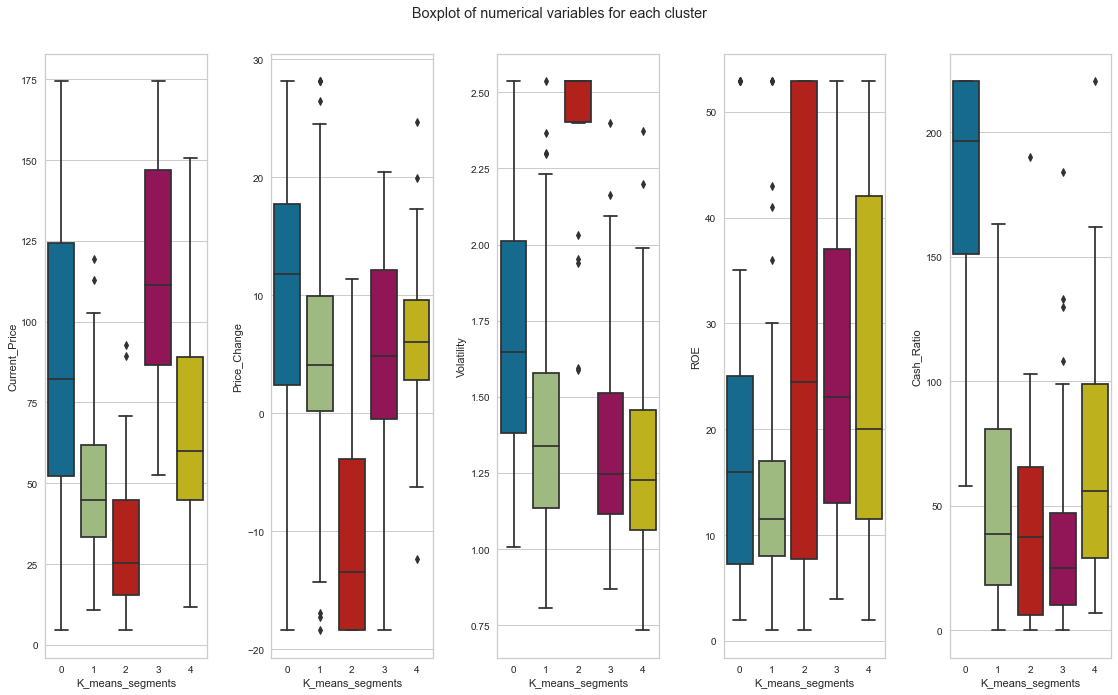

<IPython.core.display.Javascript object>

In [89]:
fig, axes = plt.subplots(1, 5, figsize=(16, 10))
fig.suptitle("Boxplot of numerical variables for each cluster")
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=df[num_col[counter]], x=df["K_means_segments"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

<AxesSubplot:xlabel='K_means_segments'>

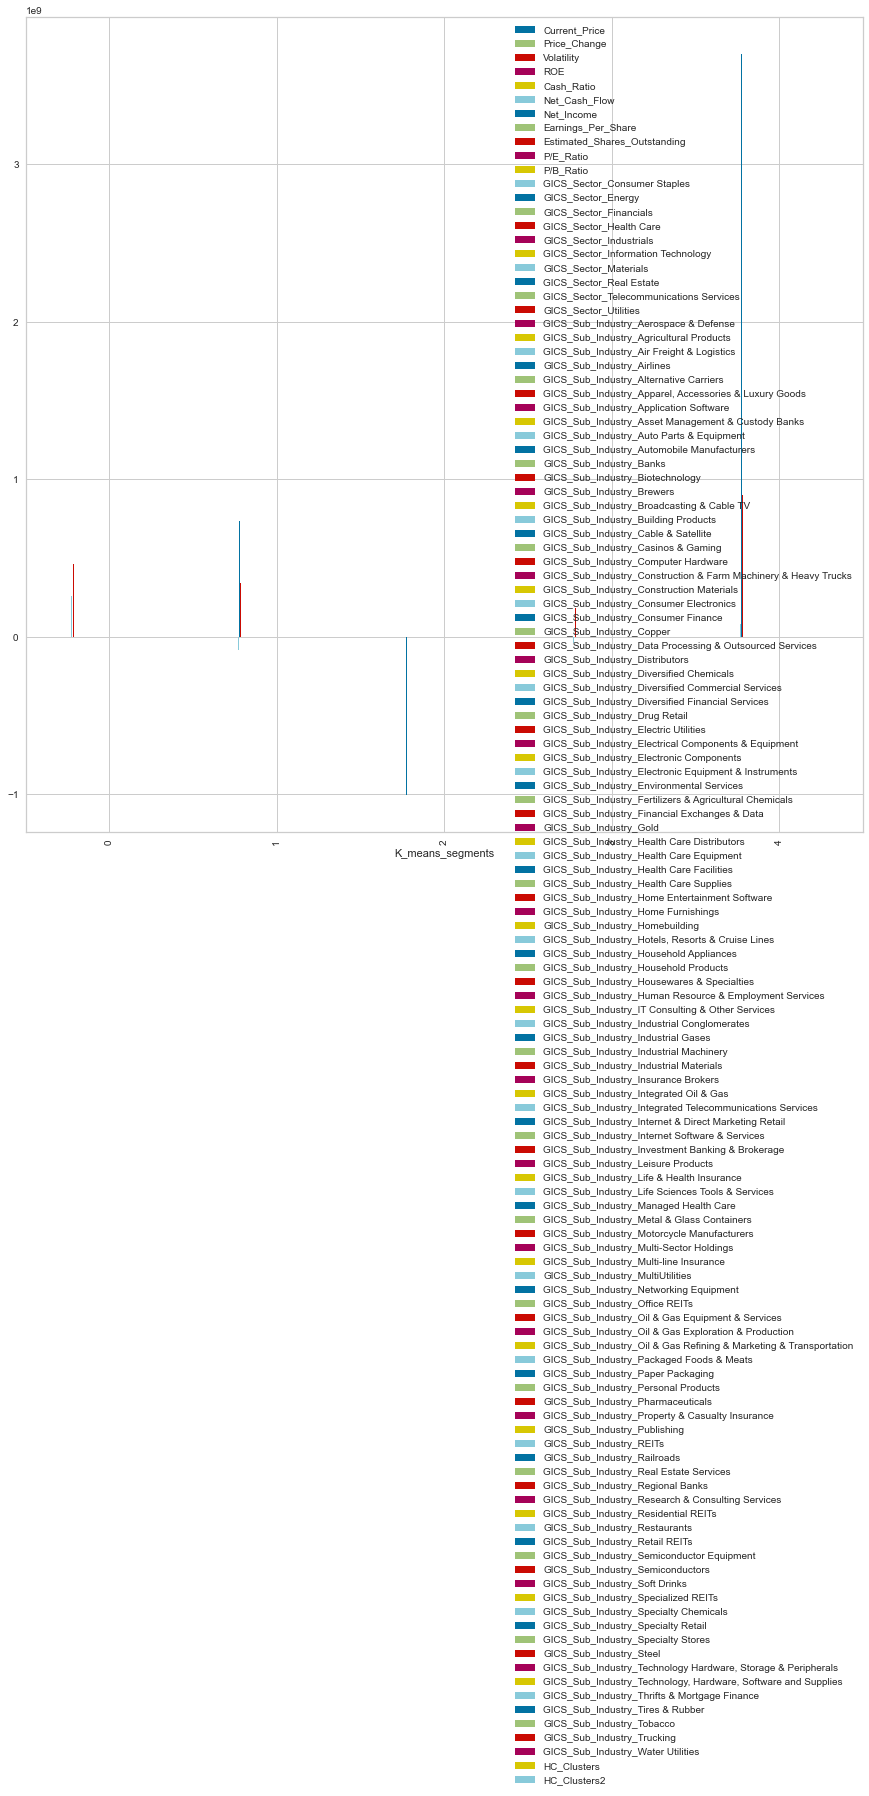

<IPython.core.display.Javascript object>

In [162]:
df.groupby("K_means_segments").mean().plot.bar(figsize=(15, 15))

### Insights

- **Cluster 0**:
    - Stocks current price are high.  
    - price change of these stocks ranges from moderate to high in this cluster.
    - Stocks in cluster 0 are moderately volatile. 
    - ROE for stocks in cluster is not very high.     
    - Cash ratio ranges from high to very high for these stocks.


- **Cluster 1**:
    - Stocks current price are low .  
    - price change of the stocks in this cluster range from negative to positive.
    - Stocks in cluster 1 are less volatile than cluster 0. 
    - ROE for thes stocks in this cluster is not very high.     
    - Cash ratio ranges from low to moderate for these stocks.


- **Cluster 2**:
    - Stocks current price are low .  
    - price change of these stocks are ranges from highly negative and reaches maximum up to 11.
    - Stocks in cluster 2 are highly volatile. 
    - ROE for stocks in cluster is very high.     
    - Cash ratio for these stocks ranges from moderate to low and ranges from 0 to 70.

- **Cluster 3**:
    - Stocks current price are in highest in the range of 80-140 with outliers .  
    - price change of these stocks ranges from highly negative to highly positive.
    - Stocks in cluster 3 are less volatile than cluster 2. 
    - ROE for stocks in cluster 3 is high and positive.     
    - Cash ratio for these stocks are low.


- **Cluster 4**:
    - Stocks current price are moderate.  
    - price change of these stocks ranges from less negative to less positive.
    - Stocks in cluster 4 are moderately volatile. 
    - ROE for stocks in cluster 4 is high.     
    - Cash ratio for these stocks are moderate with some outliers .



## Hierarchical Clustering

In [92]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.6932108674136778.
Cophenetic correlation for Euclidean distance and complete linkage is 0.6147798823663769.
Cophenetic correlation for Euclidean distance and average linkage is 0.7325610568988988.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.6496438783746495.
Cophenetic correlation for Chebyshev distance and single linkage is 0.7214024727237498.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.3680593124794425.
Cophenetic correlation for Chebyshev distance and average linkage is 0.7011385715318806.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.5032471223561586.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.6176064847170997.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.38543044504439705.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.641587600792573.
Cophenetic co

<IPython.core.display.Javascript object>

In [93]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.7325610568988988, which is obtained with Euclidean distance and average linkage.


<IPython.core.display.Javascript object>

**Let's explore different linkage methods with Euclidean distance only.**

In [94]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.6932108674136778.
Cophenetic correlation for complete linkage is 0.6147798823663769.
Cophenetic correlation for average linkage is 0.7325610568988988.
Cophenetic correlation for centroid linkage is 0.7294329307928588.
Cophenetic correlation for ward linkage is 0.5753306117577638.
Cophenetic correlation for weighted linkage is 0.6496438783746495.


<IPython.core.display.Javascript object>

In [95]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.7325610568988988, which is obtained with average linkage.


<IPython.core.display.Javascript object>

**Observations**

- We see that the cophenetic correlation is maximum with Euclidean distance and average linkage.
- The cophenetic correlation with Euclidean distance and centroid linkage is slightly less than the combination with maximum cophenetic correlation. 
- The cophenetic correlation with Euclidean distance for ward linkage is lowest. 

**Let's see the dendrograms for the different linkage methods.**

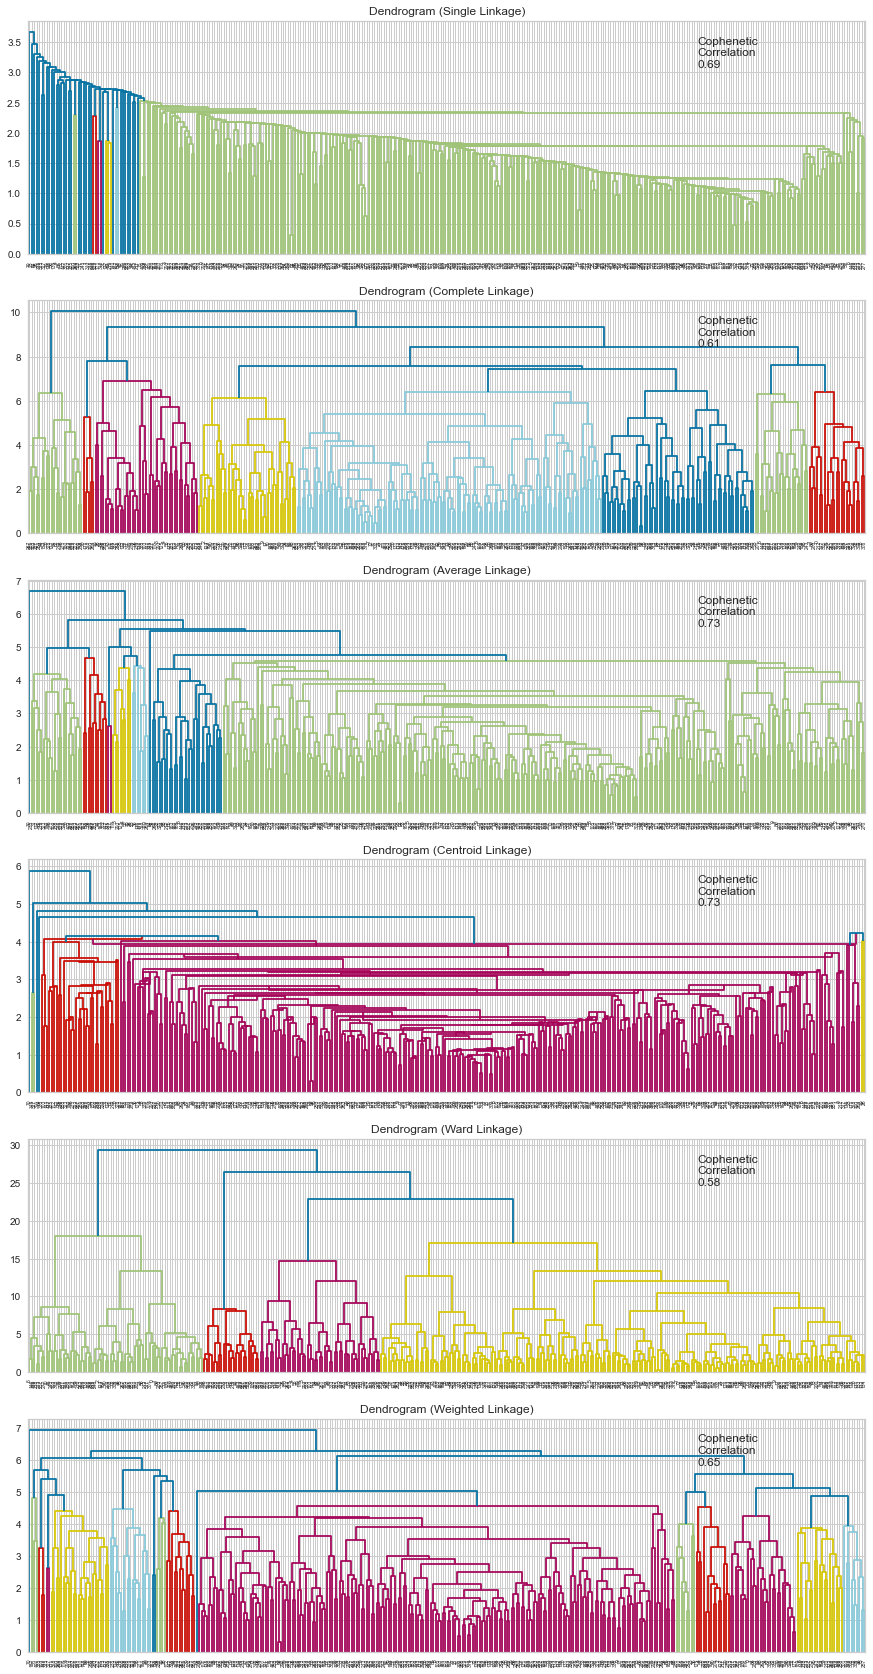

<IPython.core.display.Javascript object>

In [97]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

**Observations**

- The cophenetic correlation is highest for average and centroid linkage methods which is 0.73.
- We will move ahead with average linkage.
- 5 appears to be the appropriate number of clusters from the dendrogram for average linkage.

In [100]:
## Cluster profiling through Euclidean distance and average linkage.

HCmodel = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="average")
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(linkage='average', n_clusters=5)

<IPython.core.display.Javascript object>

In [108]:
subset_scaled_df["HC_Clusters"] = HCmodel.labels_
df["HC_Clusters"] = HCmodel.labels_

<IPython.core.display.Javascript object>

## Cluster Profiling

In [131]:
cluster_profile = df.groupby("HC_Clusters").mean()

<IPython.core.display.Javascript object>

In [163]:
cluster_profile["count_in_each_segments"] = (
    df.groupby("HC_Clusters")["Current_Price"].count().values
)

<IPython.core.display.Javascript object>

In [171]:
cluster_profile["count_in_each_segments"]

HC_Clusters2
0     17
1    290
2     31
3      1
4      1
Name: count_in_each_segments, dtype: int64

<IPython.core.display.Javascript object>

In [172]:
# let's see the names of the Stocks in each cluster
for cl in df["HC_Clusters"].unique():
    print("In cluster {}, the following stocks  are present:".format(cl))
    print(df[df["HC_Clusters"] == cl]["Ticker_Symbol"].unique())
    print()

In cluster 1, the following stocks  are present:
['AAL' 'ABBV' 'ABT' 'ADM' 'ADS' 'AEE' 'AEP' 'AFL' 'AIG' 'AIV' 'AIZ' 'AJG'
 'AKAM' 'ALB' 'ALK' 'ALL' 'ALLE' 'AMAT' 'AME' 'AMG' 'AMP' 'AMT' 'AN'
 'ANTM' 'AON' 'APH' 'ARNC' 'ATVI' 'AVB' 'AWK' 'AXP' 'BA' 'BAC' 'BAX' 'BBT'
 'BCR' 'BIIB' 'BK' 'BLL' 'BMY' 'BSX' 'BWA' 'BXP' 'C' 'CAT' 'CB' 'CBG'
 'CCI' 'CCL' 'CF' 'CFG' 'CHD' 'CHRW' 'CI' 'CINF' 'CL' 'CMA' 'CME' 'CMI'
 'CMS' 'CNC' 'CNP' 'COF' 'COO' 'CSX' 'CTL' 'CTSH' 'CTXS' 'CVS' 'CVX' 'D'
 'DAL' 'DD' 'DE' 'DFS' 'DGX' 'DHR' 'DIS' 'DISCA' 'DISCK' 'DLPH' 'DLR'
 'DNB' 'DOV' 'DPS' 'DUK' 'DVA' 'EBAY' 'ECL' 'ED' 'EFX' 'EIX' 'EMN' 'EQR'
 'ES' 'ESS' 'ETFC' 'ETN' 'ETR' 'EXC' 'EXPD' 'EXPE' 'EXR' 'F' 'FAST' 'FBHS'
 'FE' 'FIS' 'FISV' 'FLIR' 'FLR' 'FLS' 'FMC' 'FRT' 'GD' 'GGP' 'GILD' 'GLW'
 'GM' 'GPC' 'GRMN' 'GT' 'GWW' 'HAS' 'HBAN' 'HCA' 'HCN' 'HCP' 'HIG' 'HOG'
 'HON' 'HRL' 'HSIC' 'HST' 'HSY' 'HUM' 'IBM' 'IDXX' 'IFF' 'INTC' 'IP' 'IPG'
 'IRM' 'ITW' 'IVZ' 'JBHT' 'JEC' 'JNPR' 'JPM' 'KIM' 'KMB' 'KO' 'KSU' 'LEG'
 'LE

<IPython.core.display.Javascript object>

In [173]:
## Cluster profiling through Euclidean distance and complete linkage.

HCmodel2 = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="complete")
HCmodel2.fit(subset_scaled_df)

subset_scaled_df["HC_Clusters2"] = HCmodel2.labels_
df["HC_Clusters2"] = HCmodel2.labels_

cluster_profile2 = df.groupby("HC_Clusters2").mean()

cluster_profile2["count_in_each_segments"] = (
    df.groupby("HC_Clusters2")["Current_Price"].count().values
)

# let's see the names of the Stocks in each cluster
for cl in df["HC_Clusters2"].unique():
    print("In cluster {}, the following stocks  are present:".format(cl))
    print(df[df["HC_Clusters2"] == cl]["Ticker_Symbol"].unique())
    print()



In cluster 3, the following stocks  are present:
['AAL' 'ABBV' 'ABT' 'AXP' 'BA' 'BAC' 'BIIB' 'COF' 'DAL' 'DIS' 'F' 'GD'
 'GILD' 'HON' 'IBM' 'INTC' 'LMT' 'LVLT' 'LYB' 'MA' 'MDLZ' 'MET' 'MMM' 'MO'
 'MRK' 'PCLN' 'PEP' 'PFE' 'PM' 'PNC' 'PRU' 'PSX' 'TRV' 'UAL' 'UNH' 'UNP'
 'UPS' 'UTX' 'VLO' 'VZ']

In cluster 4, the following stocks  are present:
['ADBE' 'ADI' 'AIZ' 'AKAM' 'ALXN' 'AMAT' 'AMT' 'AMZN' 'APH' 'ARNC' 'AVGO'
 'BCR' 'CELG' 'CSX' 'CTSH' 'CTXS' 'CXO' 'DLR' 'EBAY' 'EQT' 'ESS' 'ETFC'
 'EW' 'EXR' 'FB' 'FRT' 'FSLR' 'FTR' 'GLW' 'HAL' 'HPE' 'HPQ' 'IVZ' 'MHK'
 'MNST' 'MYL' 'NAVI' 'NEM' 'NFLX' 'NUE' 'O' 'SCHW' 'SLG' 'SWKS' 'SYF'
 'SYK' 'TAP' 'TRIP' 'VMC' 'VRTX' 'WYNN' 'YHOO' 'ZBH']

In cluster 0, the following stocks  are present:
['ADM' 'AEE' 'AEP' 'AFL' 'AIG' 'AIV' 'AJG' 'ALB' 'ALL' 'ALLE' 'AME' 'AMG'
 'AMP' 'AN' 'ANTM' 'AON' 'ATVI' 'AWK' 'BAX' 'BBT' 'BK' 'BLL' 'BMY' 'BSX'
 'BWA' 'C' 'CAT' 'CBG' 'CCI' 'CCL' 'CF' 'CFG' 'CHD' 'CHRW' 'CHTR' 'CINF'
 'CL' 'CMA' 'CME' 'CMI' 'CMS' 'CNC' 'CNP' 'CO

<IPython.core.display.Javascript object>

In [174]:
# lets display cluster profile
cluster_profile2.style.highlight_max(color="lightgreen", axis=0)

,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,P/E_Ratio,P/B_Ratio,GICS_Sector_Consumer Staples,GICS_Sector_Energy,GICS_Sector_Financials,GICS_Sector_Health Care,GICS_Sector_Industrials,GICS_Sector_Information Technology,GICS_Sector_Materials,GICS_Sector_Real Estate,GICS_Sector_Telecommunications Services,GICS_Sector_Utilities,GICS_Sub_Industry_Aerospace & Defense,GICS_Sub_Industry_Agricultural Products,GICS_Sub_Industry_Air Freight & Logistics,GICS_Sub_Industry_Airlines,GICS_Sub_Industry_Alternative Carriers,"GICS_Sub_Industry_Apparel, Accessories & Luxury Goods",GICS_Sub_Industry_Application Software,GICS_Sub_Industry_Asset Management & Custody Banks,GICS_Sub_Industry_Auto Parts & Equipment,GICS_Sub_Industry_Automobile Manufacturers,GICS_Sub_Industry_Banks,GICS_Sub_Industry_Biotechnology,GICS_Sub_Industry_Brewers,GICS_Sub_Industry_Broadcasting & Cable TV,GICS_Sub_Industry_Building Products,GICS_Sub_Industry_Cable & Satellite,GICS_Sub_Industry_Casinos & Gaming,GICS_Sub_Industry_Computer Hardware,GICS_Sub_Industry_Construction & Farm Machinery & Heavy Trucks,GICS_Sub_Industry_Construction Materials,GICS_Sub_Industry_Consumer Electronics,GICS_Sub_Industry_Consumer Finance,GICS_Sub_Industry_Copper,GICS_Sub_Industry_Data Processing & Outsourced Services,GICS_Sub_Industry_Distributors,GICS_Sub_Industry_Diversified Chemicals,GICS_Sub_Industry_Diversified Commercial Services,GICS_Sub_Industry_Diversified Financial Services,GICS_Sub_Industry_Drug Retail,GICS_Sub_Industry_Electric Utilities,GICS_Sub_Industry_Electrical Components & Equipment,GICS_Sub_Industry_Electronic Components,GICS_Sub_Industry_Electronic Equipment & Instruments,GICS_Sub_Industry_Environmental Services,GICS_Sub_Industry_Fertilizers & Agricultural Chemicals,GICS_Sub_Industry_Financial Exchanges & Data,GICS_Sub_Industry_Gold,GICS_Sub_Industry_Health Care Distributors,GICS_Sub_Industry_Health Care Equipment,GICS_Sub_Industry_Health Care Facilities,GICS_Sub_Industry_Health Care Supplies,GICS_Sub_Industry_Home Entertainment Software,GICS_Sub_Industry_Home Furnishings,GICS_Sub_Industry_Homebuilding,"GICS_Sub_Industry_Hotels, Resorts & Cruise Lines",GICS_Sub_Industry_Household Appliances,GICS_Sub_Industry_Household Products,GICS_Sub_Industry_Housewares & Specialties,GICS_Sub_Industry_Human Resource & Employment Services,GICS_Sub_Industry_IT Consulting & Other Services,GICS_Sub_Industry_Industrial Conglomerates,GICS_Sub_Industry_Industrial Gases,GICS_Sub_Industry_Industrial Machinery,GICS_Sub_Industry_Industrial Materials,GICS_Sub_Industry_Insurance Brokers,GICS_Sub_Industry_Integrated Oil & Gas,GICS_Sub_Industry_Integrated Telecommunications Services,GICS_Sub_Industry_Internet & Direct Marketing Retail,GICS_Sub_Industry_Internet Software & Services,GICS_Sub_Industry_Investment Banking & Brokerage,GICS_Sub_Industry_Leisure Products,GICS_Sub_Industry_Life & Health Insurance,GICS_Sub_Industry_Life Sciences Tools & Services,GICS_Sub_Industry_Managed Health Care,GICS_Sub_Industry_Metal & Glass Containers,GICS_Sub_Industry_Motorcycle Manufacturers,GICS_Sub_Industry_Multi-Sector Holdings,GICS_Sub_Industry_Multi-line Insurance,GICS_Sub_Industry_MultiUtilities,GICS_Sub_Industry_Networking Equipment,GICS_Sub_Industry_Office REITs,GICS_Sub_Industry_Oil & Gas Equipment & Services,GICS_Sub_Industry_Oil & Gas Exploration & Production,GICS_Sub_Industry_Oil & Gas Refining & Marketing & Transportation,GICS_Sub_Industry_Packaged Foods & Meats,GICS_Sub_Industry_Paper Packaging,GICS_Sub_Industry_Personal Products,GICS_Sub_Industry_Pharmaceuticals,GICS_Sub_Industry_Property & Casualty Insurance,GICS_Sub_Industry_Publishing,GICS_Sub_Industry_REITs,GICS_Sub_Industry_Railroads,GICS_Sub_Industry_Real Estate Services,GICS_Sub_Industry_Regional Banks,GICS_Sub_Industry_Research & Consulting Services,GICS_Sub_Industry_Residential REITs,GICS_Sub_Industry_Restaurants,GICS_Sub_Industry_Retail REITs,GICS_Sub_Industry_Semicon

<IPython.core.display.Javascript object>

In [175]:
cluster_profile2["count_in_each_segments"]

HC_Clusters2
0    185
1     39
2     23
3     40
4     53
Name: count_in_each_segments, dtype: int64

<IPython.core.display.Javascript object>

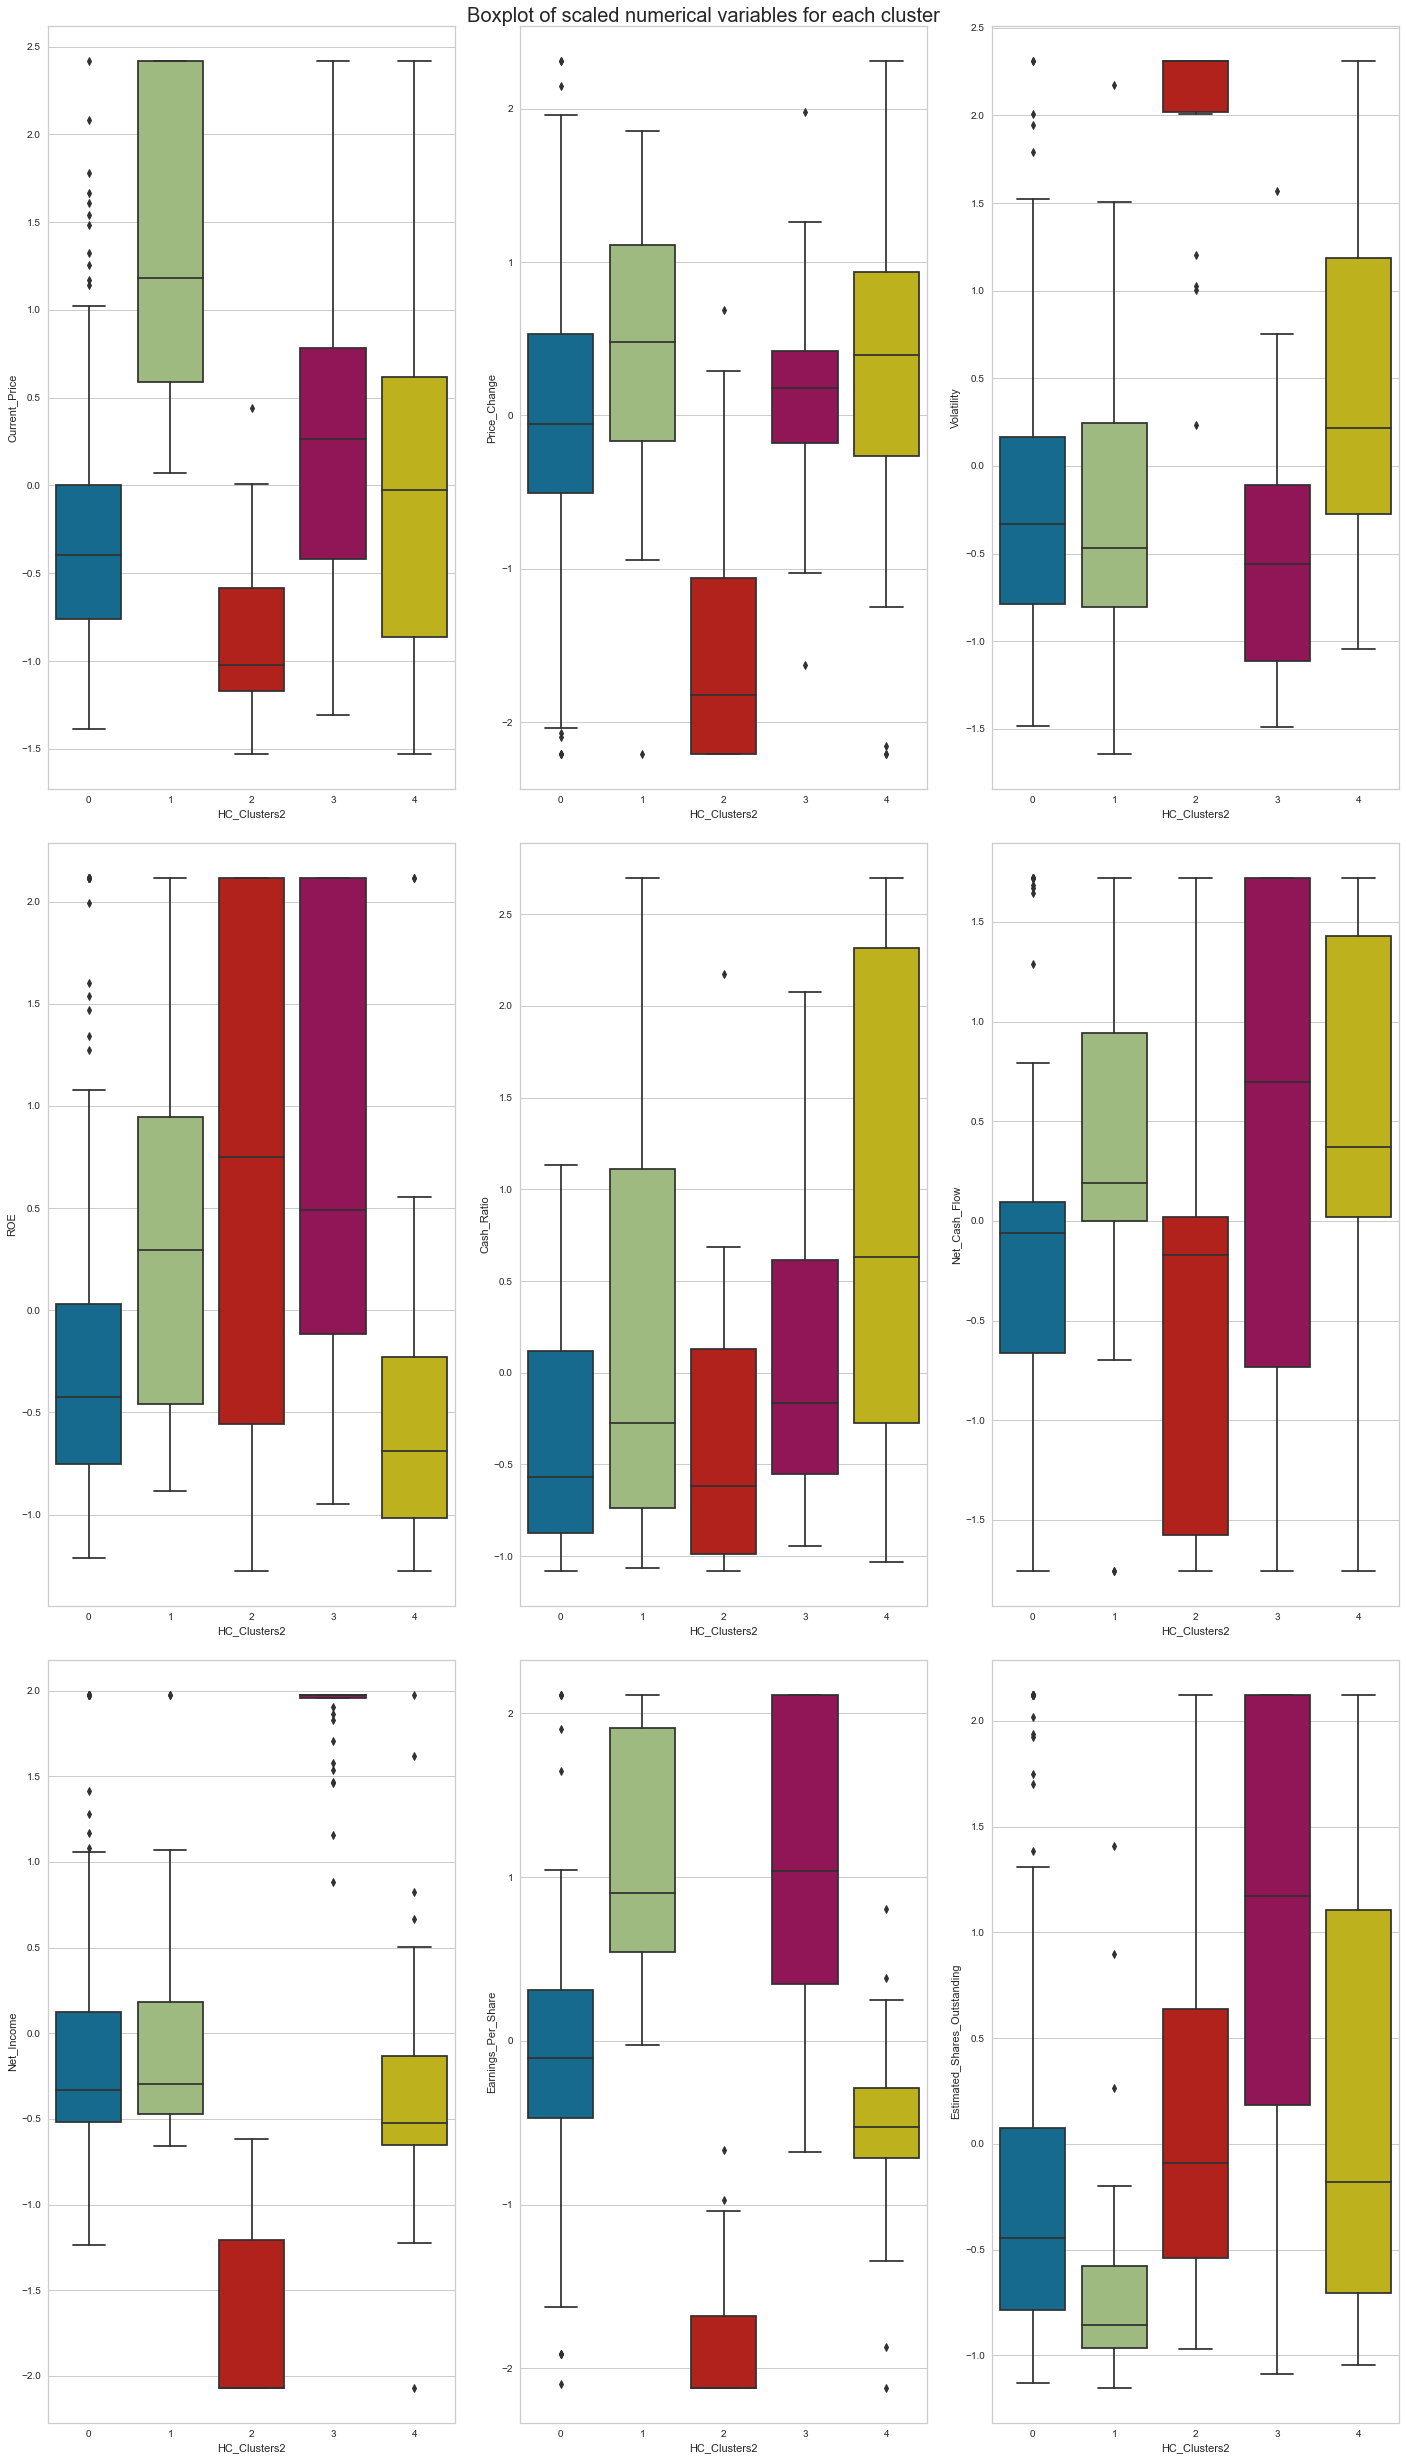

<IPython.core.display.Javascript object>

In [176]:
## Plotting the Boxplot for the clusters, Which is for Euclidean distance and complete linkage.  

fig, axes = plt.subplots(3, 3, figsize=(20, 35))
fig.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(3):
    sns.boxplot(
        ax=axes[ii][0],
        y=subset_scaled_df[num_cols[counter]],
        x=subset_scaled_df["HC_Clusters2"],
    )
    counter = counter + 1
    sns.boxplot(
        ax=axes[ii][1],
        y=subset_scaled_df[num_cols[counter]],
        x=subset_scaled_df["HC_Clusters2"],
    )
    counter = counter + 1
    sns.boxplot(
        ax=axes[ii][2],
        y=subset_scaled_df[num_cols[counter]],
        x=subset_scaled_df["HC_Clusters2"],
    )
    counter = counter + 1


fig.tight_layout(pad=2.0)

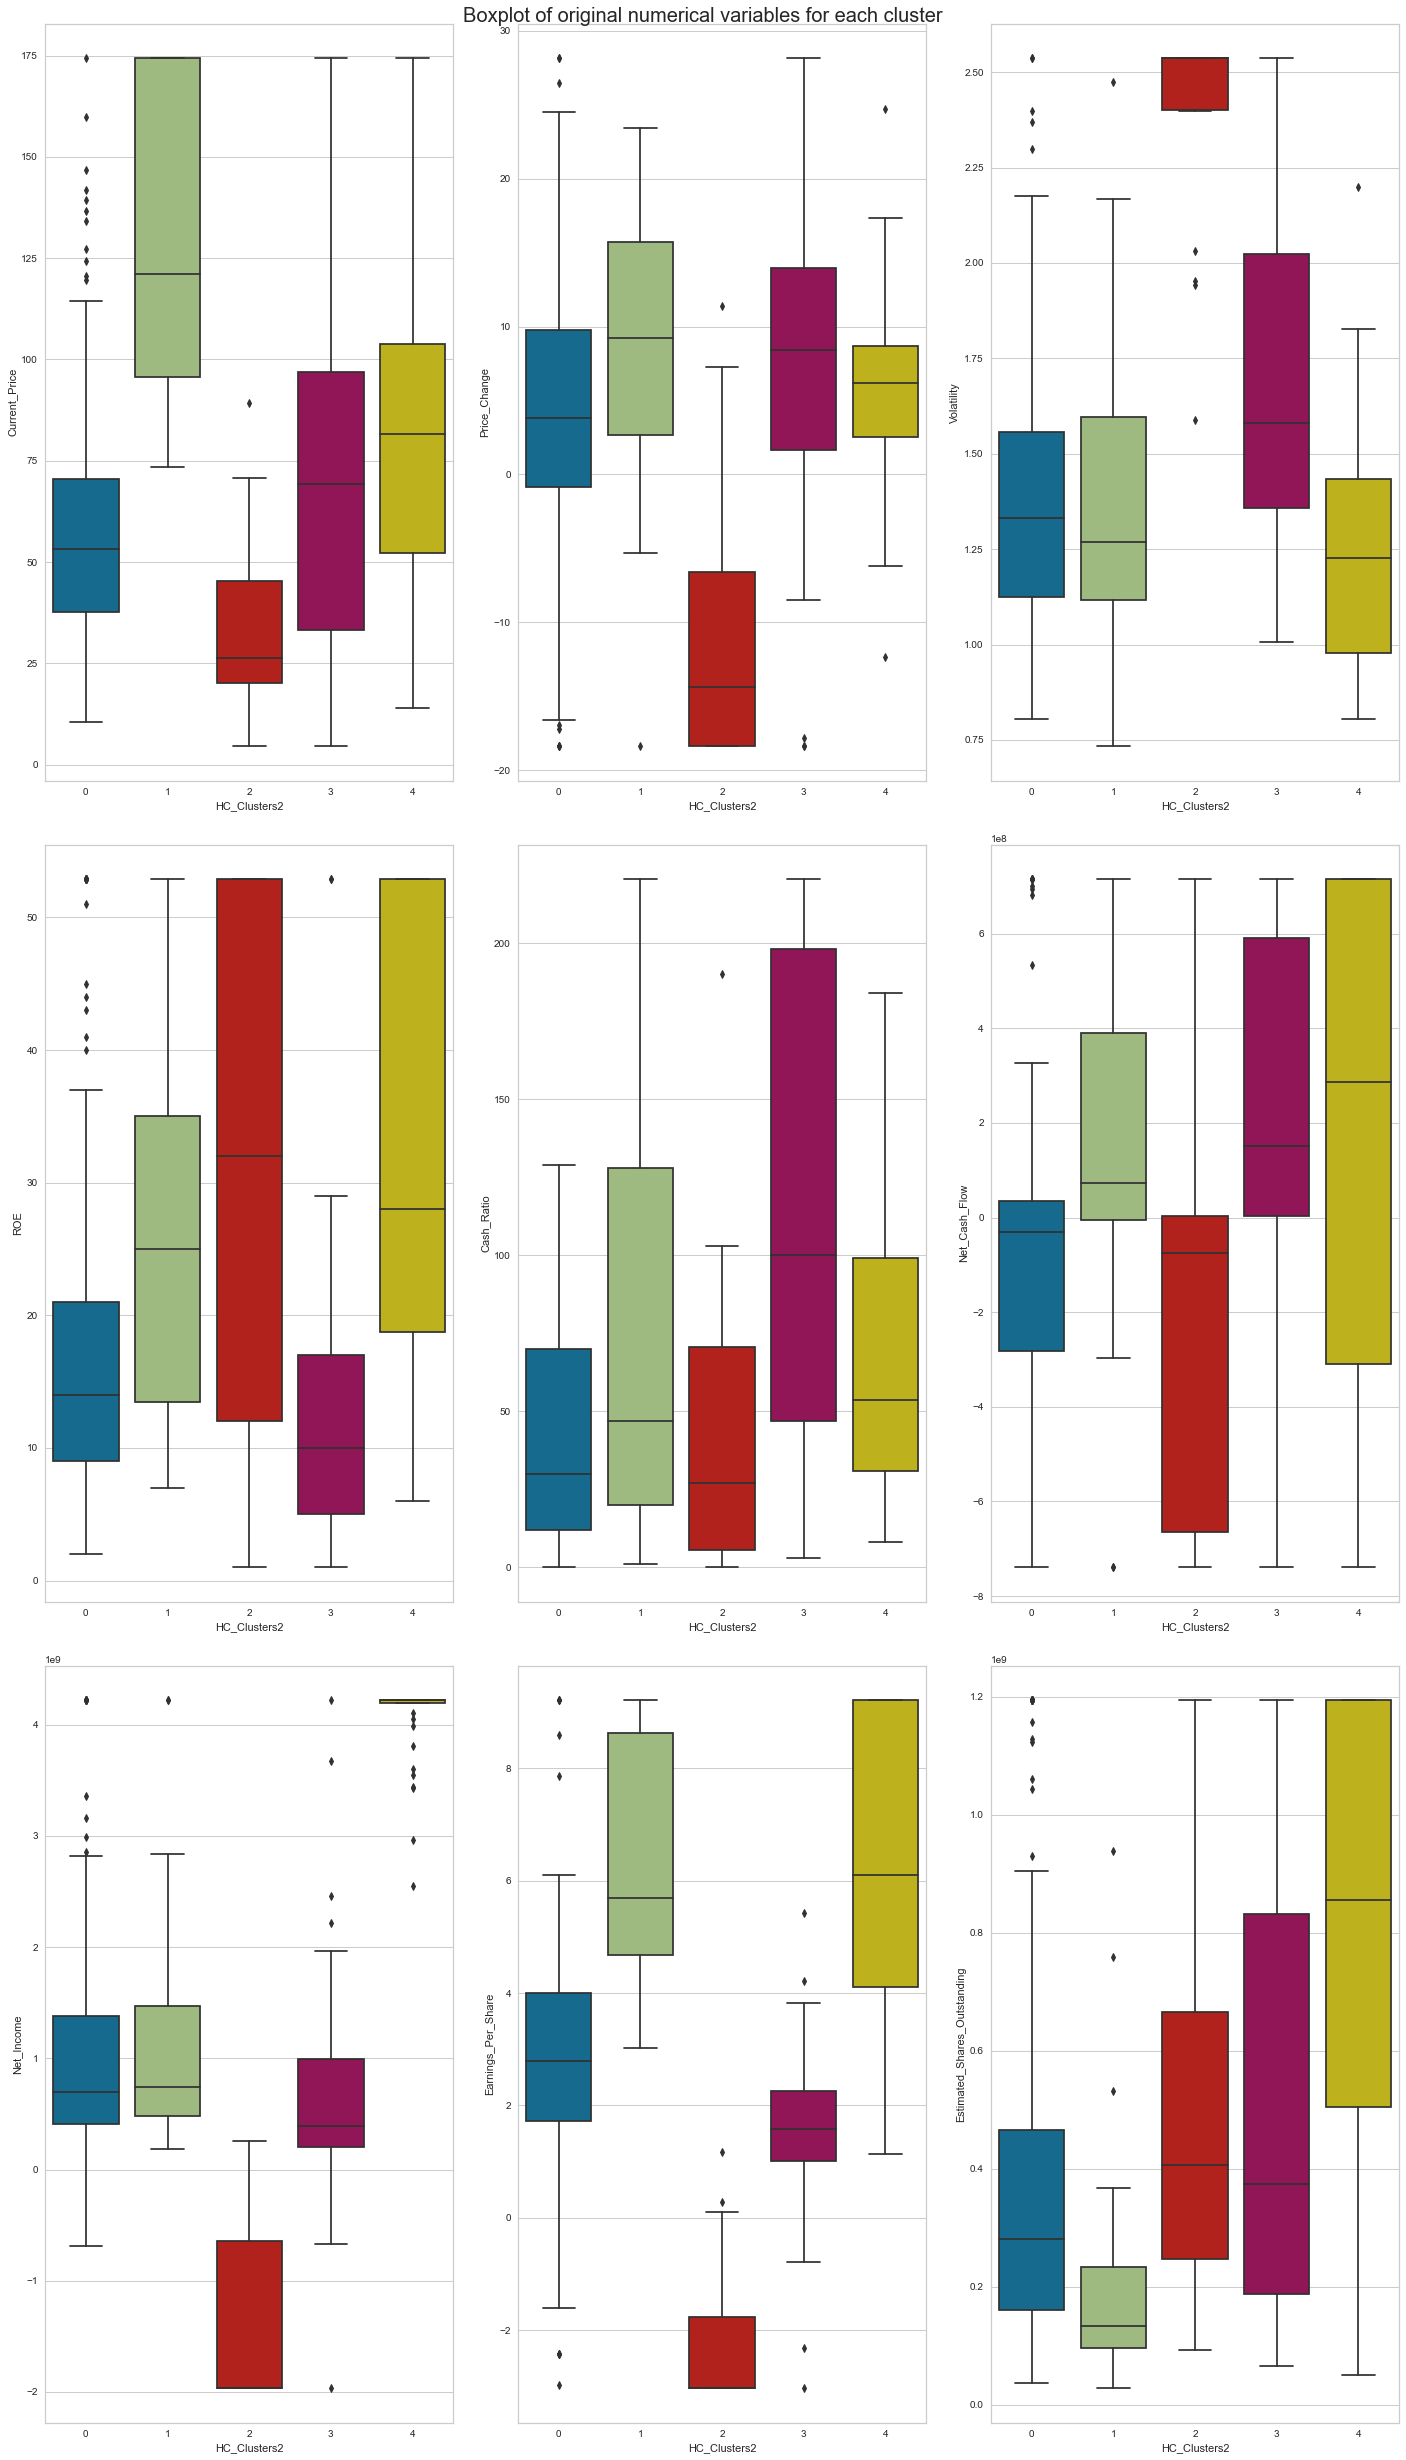

<IPython.core.display.Javascript object>

In [155]:
fig, axes = plt.subplots(3, 3, figsize=(20, 35))
fig.suptitle("Boxplot of original numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(3):
    sns.boxplot(ax=axes[ii][0], y=df[num_cols[counter]], x=df["HC_Clusters2"])
    counter = counter + 1
    sns.boxplot(ax=axes[ii][1], y=df[num_cols[counter]], x=df["HC_Clusters2"])
    counter = counter + 1
    sns.boxplot(ax=axes[ii][2], y=df[num_cols[counter]], x=df["HC_Clusters2"])
    counter = counter + 1


fig.tight_layout(pad=2.0)

## Insights

- **Cluster 0**:
    - Stocks current price in the cluster 0 ranges from median current price of 55.  
    - price change for these stocks ranges from negative -15 to positive 40 which is from low to high.
    - Volatility ranged from 0.50 to 2.10 for the stocks in the cluster 0 which means thes stocks are slightly higher side in volatility index. 
    - ROE for stocks in cluster is not very high.     
    - Cash ratio ranges from high to very high for these stocks.
    - Earnings per share is median value is 3 which is kind of moderate. 


- **Cluster 1**:
    - Stocks current prices are on higher side with median value of close to 120.  
    - price change of the stocks in this cluster is also on higher side with a median value of close to 10.
    - Stocks in cluster 1 are less volatile than cluster 0. 
    - ROE for these stocks in this cluster is between the range of low to moderately high.      
    - Cash ratio ranges from low to moderate for these stocks.
    - Net income flow is also on the slightly higher side for these stocks. 
    - Earning per share for these stocks are higher than the stocks in cluster 0 which means that these stocks a very good in value and are growth stocks. 


- **Cluster 2**:
    - Stocks current price ranges from low to moderate with median price value falls more than 25 and maximum stocks price is less than 50.  
    - price change of these stocks are mostly negative that means these stocks are mostly not giving any value.
    - Stocks in cluster 2 are highly volatile hence these stocks are very risky for the portfolio. 
    - ROE for stocks in this cluster are in the range of low to high with a median of 35.   
    - Cash ratio for these stocks ranges from moderate to low.
    - EPS on these stocks are very low which means these companies are have a negative cash flow and are and hence low net income, Investing in these stocks are not profitable.
    - Net cash flow of for the stocks in this cluster is negative which indicate that a company's liquid assets are decreasing. 


- **Cluster 3**:
    - Stocks current price are in highest in the range of low to moderately high with a median price of more than 50.
    - price change of these stocks are positive and mostly stocks closed at positive value even after reaching to the lowest level.
    - Stocks in cluster 3 moderately volatile which shows that stocks in this cluster are pretty stable and it means greater profits.
    - ROE for stocks in cluster 3 is moderate with and positive outlook.     
    - Cash ratio for these stocks are high with a median of 100 which means these companies are having less liabilities.
    - Net cash flow of for the stocks in this cluster is positive which indicate that a company's liquid assets are increasing.



- **Cluster 4**:
    - Stocks current price are in the range between 50-100.  
    - price change of these stocks are not very high and in the range of 3 > price change < 10.
    - Stocks in cluster 4 are not very volatile hence these are not very risky. 
    - ROE for stocks in cluster 4 is high with a median value of more than 25%. Return on equity near the long-term average is an acceptable ratio and anything less than 10% considered as poor.   
    - Cash ratio for these stocks are moderate.
    - Net cash flow for the stocks in cluster 4 is between negative to positive with a median value of 3, Which indicate that liquid assets of these companies in the the long term are increasing. 
    - Net income for these stocks are very high which means these companies are profitable after all expenses and taxes.
    - Earning per share is also high for these stocks which means companies are growing profits. the stock share price will likely increase as investors buy up outstanding shares of stock. As a result, a higher EPS typically leads to       a high stock price.
    - Estimated Shares outstanding of these stocks are in a very good high range.       
    
## Recommendations

**Cluster 5 countries are good places to provide tourism services based on cluster profiling done above.**

## K-means vs Hierarchical Clustering

- K-means cluster took less computation time than Hierarchical clustering. In Hierarchical clustering we calculated cluster distances using multiple linkage methods. 
- Both K-means and Hierarchical Clustering techniques suggested to create 5 clusters for our stocks data to compare all the variables.
- Both clustering techniques spread stock data across the clusters. 


## Actionable Insights and Recommendations

Based upon the clustering profiles through various clustering techniques, We got some insights that. 

- Cluster 3 and Cluster 4 stocks current price falls into the mid cap sector which is more affordable to the investors.   
- Cluster 3 and Cluster 4 stocks price change is positive which shows stability with-in these stocks, The price change is not significantly very high but provide stable rise in 13 weeks duration. 
- Cluster 3 and Cluster 4 stocks are less volatile than any other cluster which means there is less risk involves for the investors.
- Cluster 3 ROE is  highest among all the clusters which shows solid growth among these companies. 
- Cluster 3 cash ratio which provides measure of companies ability to cover it's short-term obligation is also a decent. 
- Cluster 4 cash ratio which provides measure of companies ability to cover it's short-term obligation is highest. 
- Cluster 3 Net cash flow is second best among all the clusters which shows growth among these companies. 
- Cluster 4 Net cash flow is highest among all the clusters which shows growth among these companies. 
- Cluster 3 stocks net income is the highest among all the clusters. 
- Cluster 3 stocks have second highest earnings per share which shows company's profitability and is one of the most popular metrics that analysts point to when evaluating stocks. 
- Estimated shares outstanding are highest for cluster 3. 
- Cluster 4 stocks have second best P/E ratio,Which helps in determining the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings       

**Based upon these findings we recommend our customers to add the stocks either from cluster 3 or cluster 4 
into their portfolio for long term growth potential. Cluster 3 has a mixed bag of total 40 stocks from where majority of stocks are from Consumer staples,Industries,Telecom, Aerospace
Whereas Cluster 4 also consist of total 53 stocks with the mixed bag of all the sectors**


